In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from model import Model
from plot_utilities import plot_losses, plot_surface, plot_error, plot_contour
tf.keras.backend.set_floatx('float64')

In [15]:
# Set up the training and test data of the unit square domain
tf.random.set_seed(0)

N = 1000  # number of points in the domain
x = tf.random.uniform((N, 2), dtype=tf.float64)  # random values from a uniform distribution

# split data into training and test sets
x_train = x[:100]  # 100 points for training
x_test = x[100:]  # 900 points for testing

In [16]:
def trial_fn(x, nn):
        return x[:, 0:1] * (x[:, 0:1]-1.) * x[:, 1:2] * (x[:, 1:2]-1.) * nn(x)

def pde_lagaris(x, nn, training=False):
    with tf.GradientTape() as tape1:
        with tf.GradientTape() as tape2:
            tape1.watch(x)
            tape2.watch(x)
            u = trial_fn(x, nn)
        d_u = tape2.gradient(u, x)  # first derivatives (u_x, u_y)
    d2_u = tape1.batch_jacobian(d_u, x)  # Hessian matrix (u_xx, u_xy; u_yx, u_yy)

    u_xx = d2_u[:, 0, 0:1]
    u_yy = d2_u[:, 1, 1:2]
    f = 13. * np.pi**2. * tf.sin(2.*np.pi*x[:, 0:1]) * tf.sin(3.*np.pi*x[:, 1:2])

    return tf.reduce_mean(tf.square(-u_xx - u_yy - f))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 65 (520.00 Byte)
Trainable params: 65 (520.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None
Epoch 1000 -- Training loss: 4260.825546504159
Epoch 2000 -- Training loss: 3707.134856191443
Epoch 3000 -- Training loss: 2950.531075685541
Epoch 4000 -- Training loss: 2563.215716387685
Epoch 5000 -- Training loss: 2353.745509379147
Epoch 6000 -- Training loss: 1921.4946726092726
Epoch 7000 -- Training loss: 1390.6212023399744
Epoch 8000 -- Training loss: 949.0295850655332
Epoch 9000 -- Training loss: 686.3648892170211
Epoch 10000 -- Training loss: 525.9593646171825
Epoch 11000 -- Training loss: 391.05664551183406
Epoch 12000 -- Training loss: 297.9547039827667
Epoch 13000 -- Training loss: 256.39039541831806
Epoch 14000 -- Training loss: 223.532775383212
Epoch 15000 -- Training loss: 188.11920694359412
Epoch 16000 -- Training loss: 154.03127940913498
Epoch 17000 -- Training loss: 126.1329462925906
Epoch 18000 -- Training loss: 105.77712942527032
Epoch 19000 -- Training loss: 88.71077795393005
Epoch 20000 -- Training loss: 73.50127369689103
Epoch 21000 -- Training loss: 59.58241

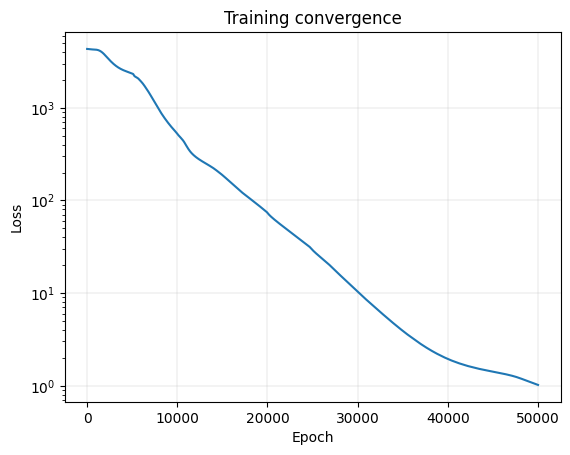

In [4]:
hidden_layers = [16]

network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Input(shape=(2,)))
for nodes in hidden_layers:
  network.add(tf.keras.layers.Dense(nodes, activation='tanh'))
network.add(tf.keras.layers.Dense(1))
print(network.summary())

optimiser = tf.keras.optimizers.Adam(learning_rate=1e-3, weight_decay=None)
model = Model(pde_lagaris, network, optimiser)

# Train the model
losses = model.train(x_train, num_epochs=50000, verbose=True)

# Plot the convergence
fig, ax = plt.subplots()
ax.semilogy(np.arange(len(losses)), losses)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.grid(linewidth=0.2)
ax.set_title('Training convergence')

# Test the trained model
test_loss = model.test(x_test)
print(f'Test loss: {test_loss}')

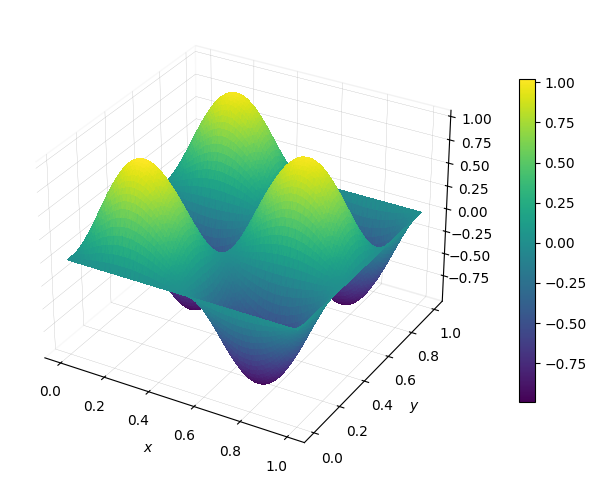

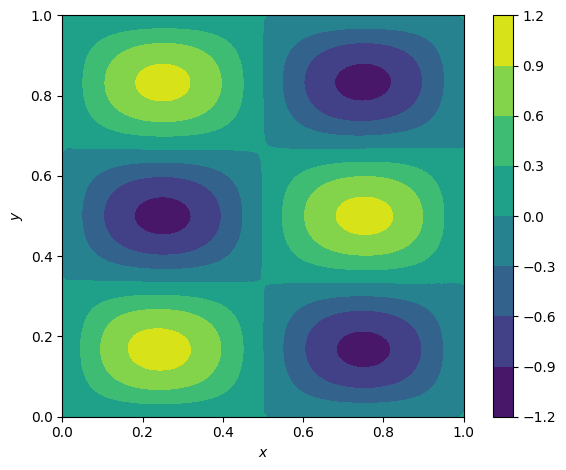

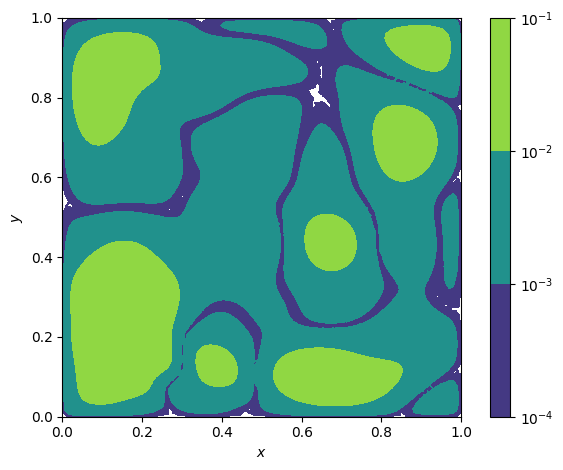

In [6]:
# Plot the solution on a fine uniform grid for aesthetic purposes
x_ = tf.linspace(0, 1, 101)
x_grid = tf.reshape(tf.stack(tf.meshgrid(x_, x_), axis=2), (-1, 2))

v = trial_fn(x_grid, model.net)
fig, _ = plot_surface(x_grid, v)
fig.savefig('figures/p3_lagaris_sin_init_surf.png', dpi=300, bbox_inches='tight')

fig, _ = plot_contour(x_grid, v)
fig.savefig('figures/p3_lagaris_sin_init_cont.png', dpi=300, bbox_inches='tight')

# Plot the absolute error of the trial solution and the analytical solution
u_analytical = lambda x, y: tf.sin(2.*np.pi*x) * tf.sin(3.*np.pi*y)
fig, _ = plot_error(x_grid, v, u_analytical, title=False, levels=np.logspace(-4, -1, 4))
fig.savefig('figures/p3_lagaris_sin_init_error.png', dpi=300, bbox_inches='tight')

Epoch 50000 -- Training loss: 1.2581785263148386
lr=0.01_activation=sigmoid_hidden_layers=[16]
Final loss: 1.2581785263148386
Test loss: 15.23650426792178


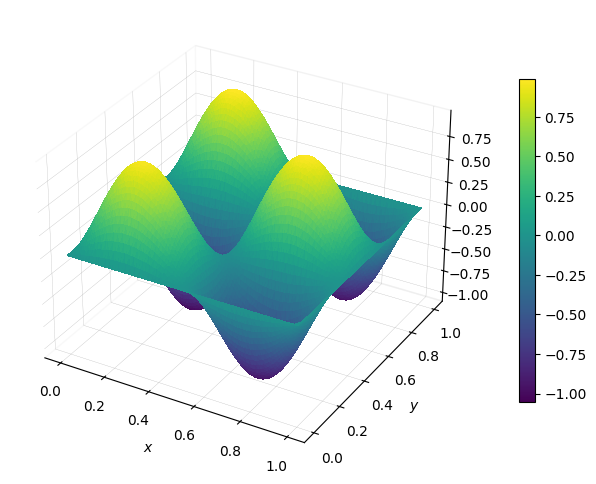

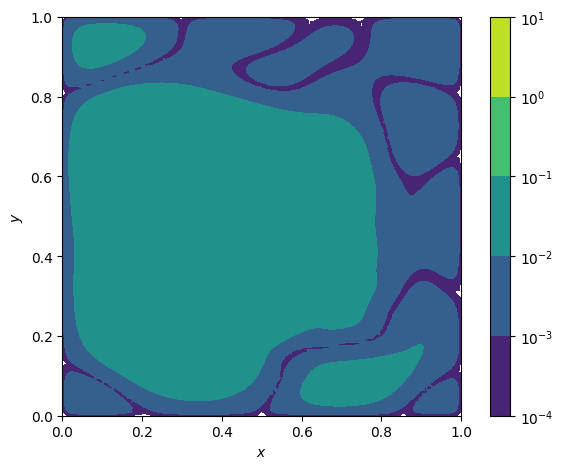

/Users/davord/Library/CloudStorage/OneDrive-UniversitetetiOslo/project3/venv_project3/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 50000 -- Training loss: 0.0022398856517386904
lr=0.01_activation=sigmoid_hidden_layers=[32]
Final loss: 0.0022398856517386904
Test loss: 111.40308652337818


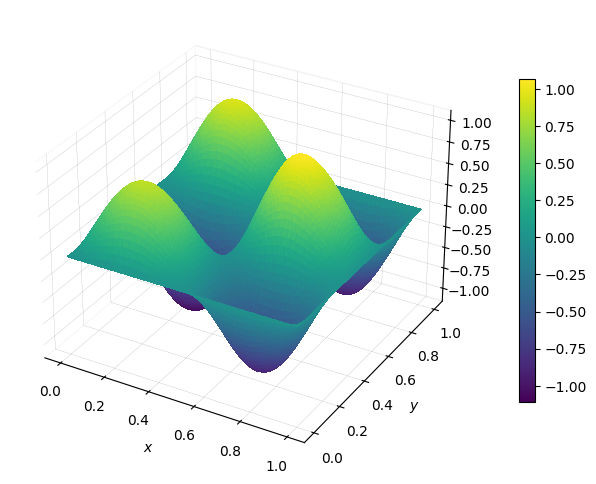

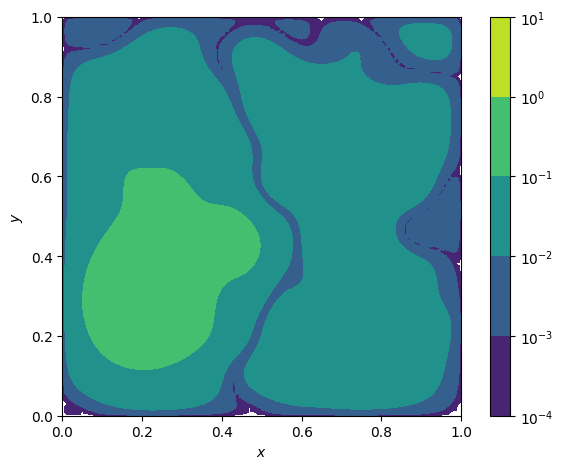

Epoch 50000 -- Training loss: 174.5474312103709
lr=0.01_activation=sigmoid_hidden_layers=[16, 16]
Final loss: 174.5474312103709
Test loss: 153559.07682834115


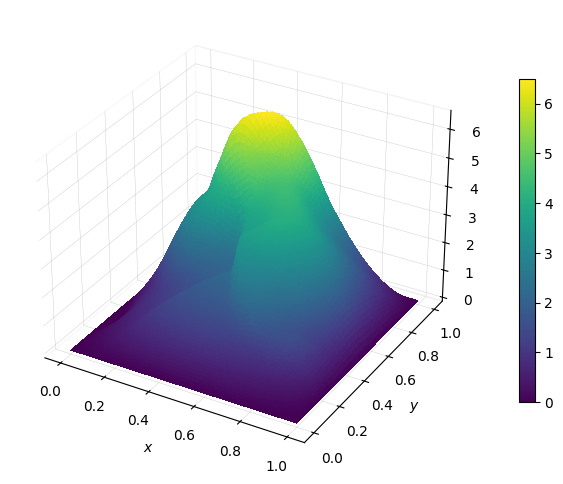

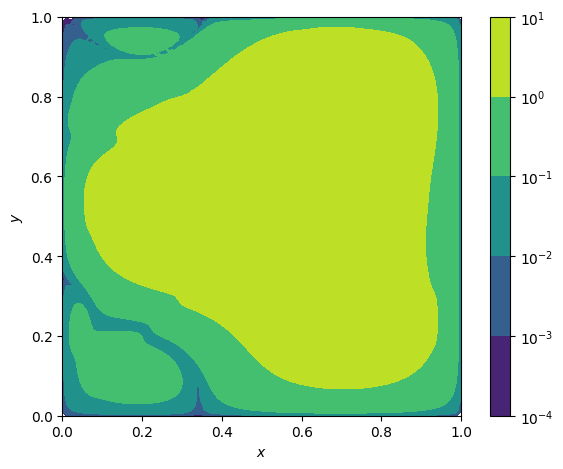

Epoch 50000 -- Training loss: 441.8355791286715


lr=0.01_activation=sigmoid_hidden_layers=[32, 32]
Final loss: 441.8355791286715
Test loss: 364154.2083274823


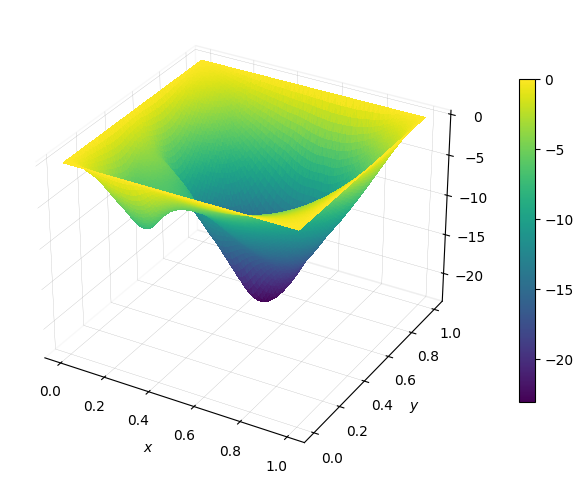

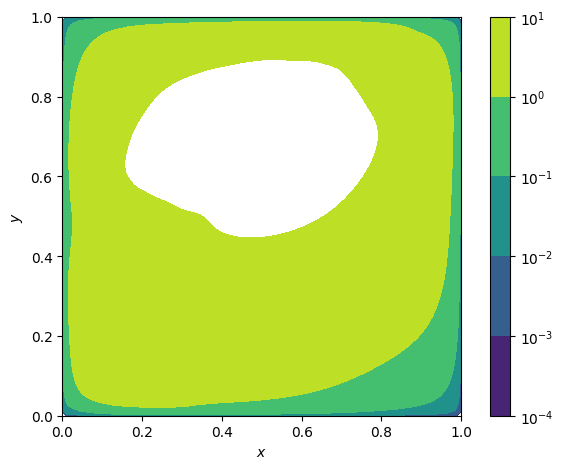

Epoch 50000 -- Training loss: 204.11817915961845


lr=0.01_activation=sigmoid_hidden_layers=[16, 16, 16]
Final loss: 204.11817915961845
Test loss: 112036.75264520833


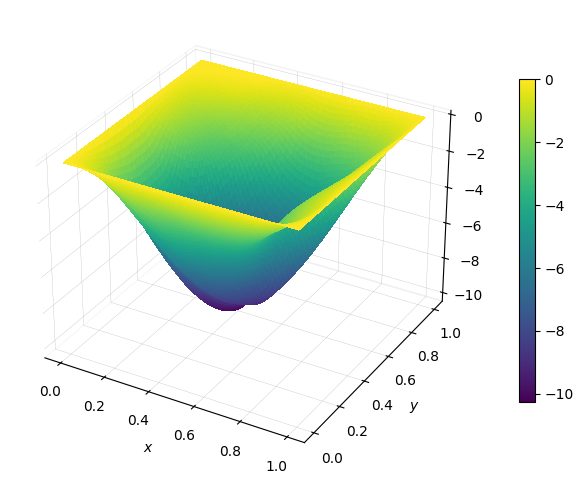

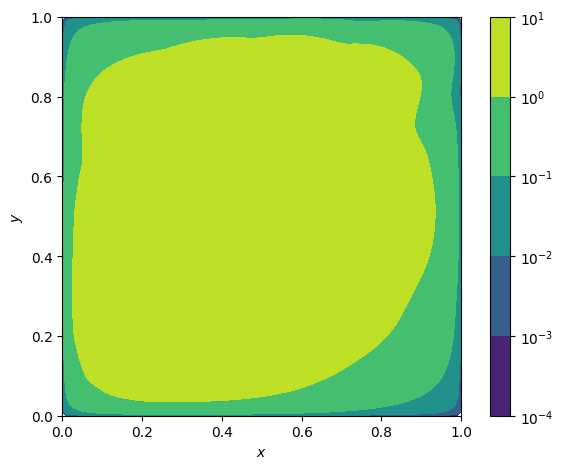

Epoch 50000 -- Training loss: 0.10016870579891694
lr=0.01_activation=sigmoid_hidden_layers=[32, 32, 32]
Final loss: 0.10016870579891694
Test loss: 2871.45504125529


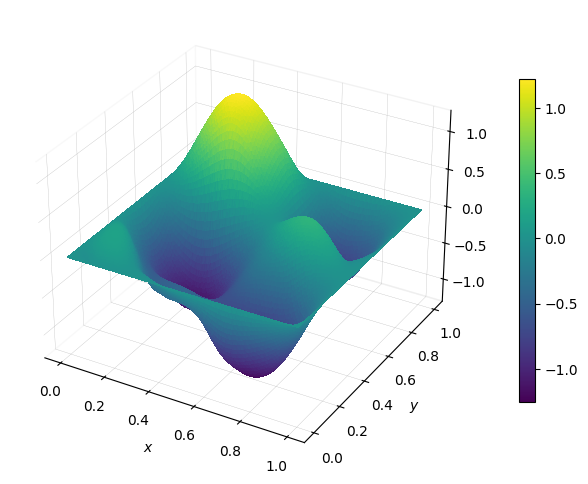

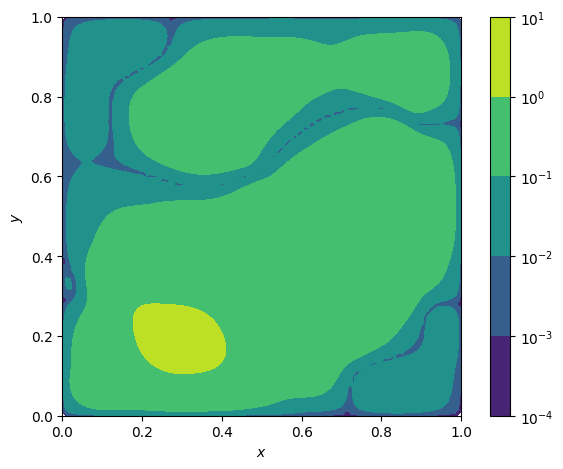

Epoch 50000 -- Training loss: 4.544344781201436
lr=0.01_activation=tanh_hidden_layers=[16]
Final loss: 4.544344781201436
Test loss: 293.6397219725675


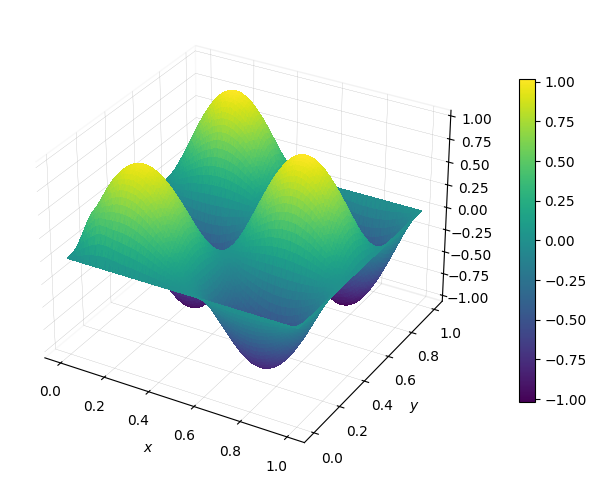

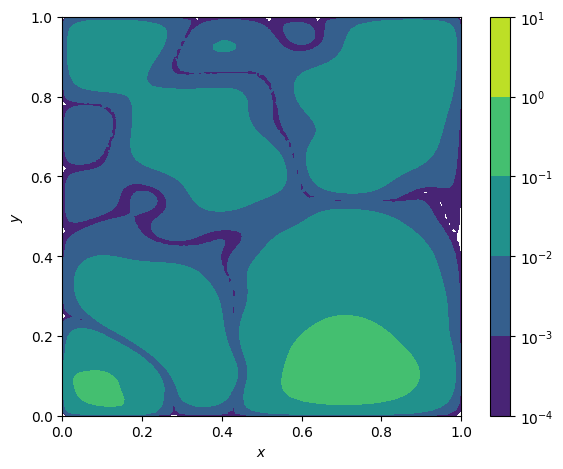

Epoch 50000 -- Training loss: 0.007416674447040603
lr=0.01_activation=tanh_hidden_layers=[32]
Final loss: 0.007416674447040603
Test loss: 37.381486534701004


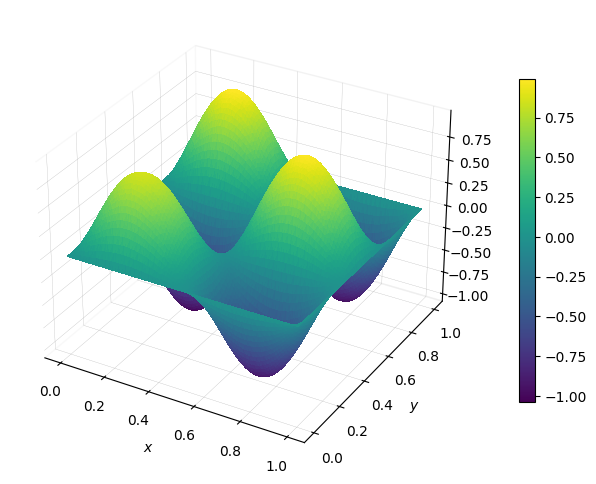

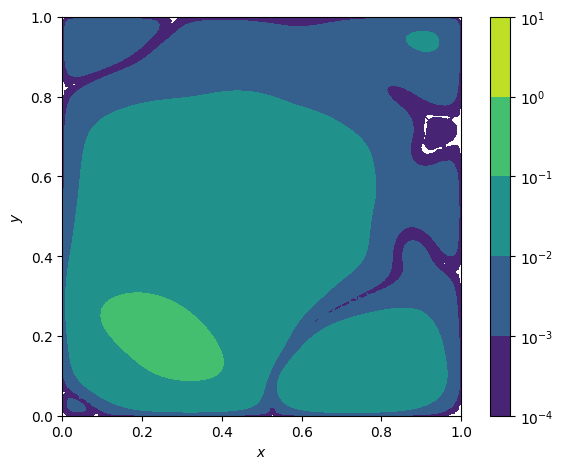

Epoch 50000 -- Training loss: 940.4050506772156
lr=0.01_activation=tanh_hidden_layers=[16, 16]
Final loss: 940.4050506772156
Test loss: 84007.96184498118


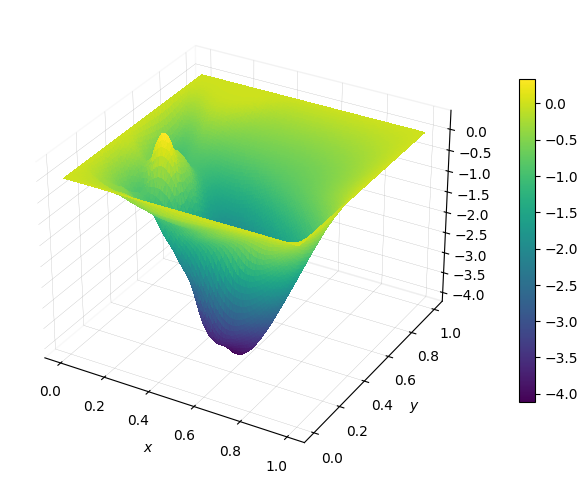

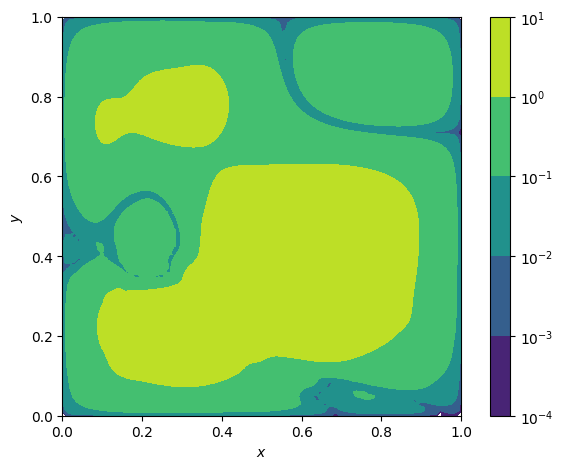

Epoch 50000 -- Training loss: 20.954137155698874
lr=0.01_activation=tanh_hidden_layers=[32, 32]
Final loss: 20.954137155698874
Test loss: 13169.715466136979


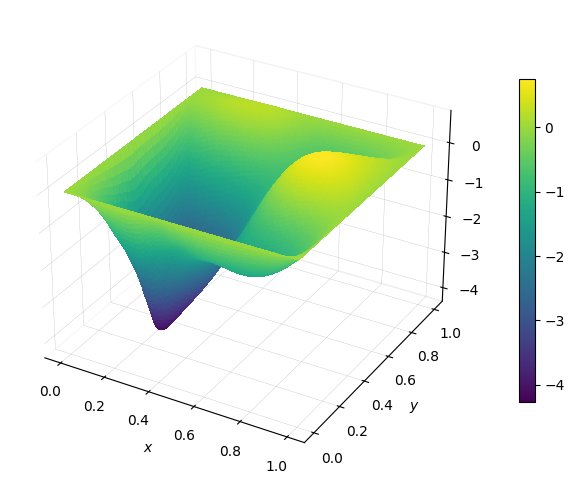

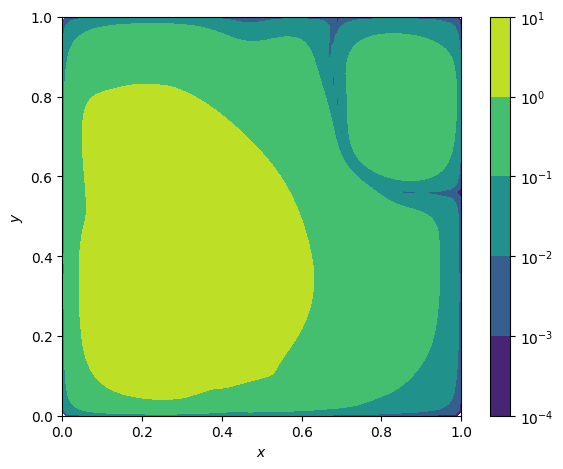

Epoch 50000 -- Training loss: 1418.2522180554029
lr=0.01_activation=tanh_hidden_layers=[16, 16, 16]
Final loss: 1418.2522180554029
Test loss: 57128.54218698164


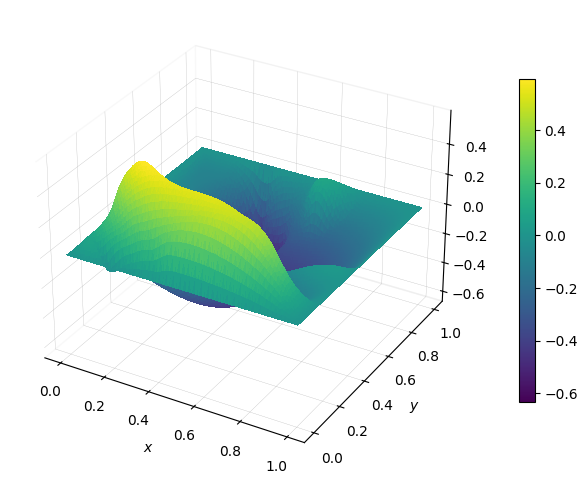

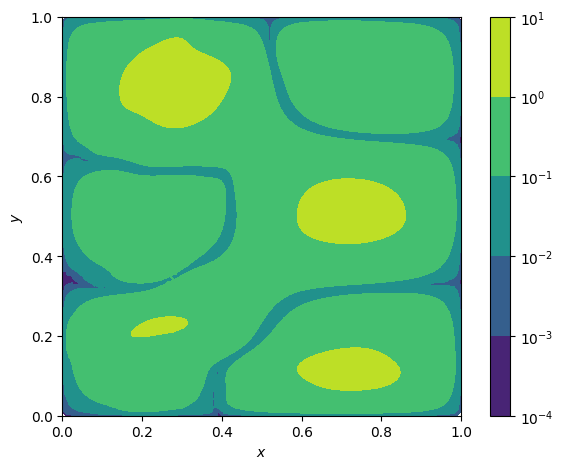

Epoch 50000 -- Training loss: 2.58021800168438
lr=0.01_activation=tanh_hidden_layers=[32, 32, 32]
Final loss: 2.58021800168438
Test loss: 1834.4285567329002


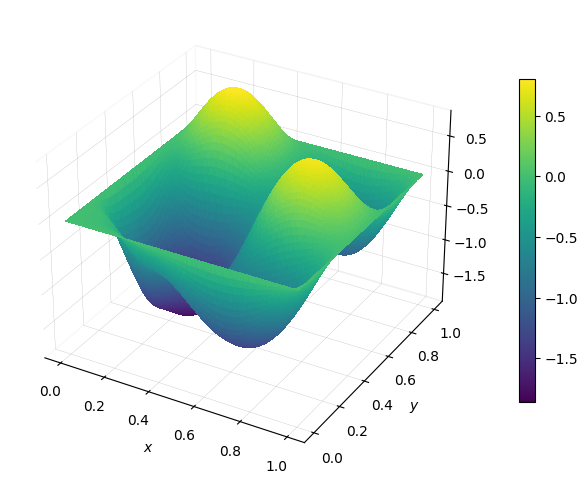

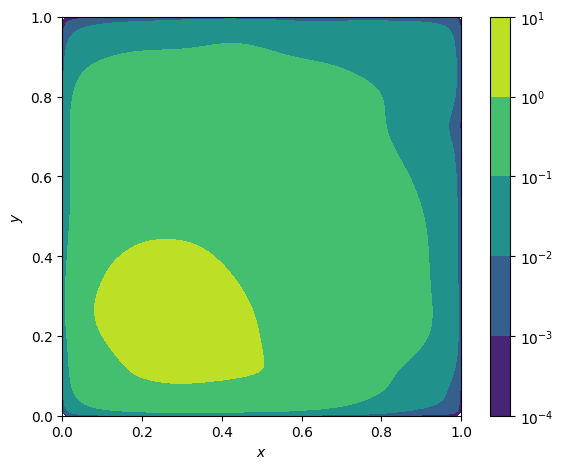

Epoch 50000 -- Training loss: 0.0016886315625370969
lr=0.01_activation=<function <lambda> at 0x16c180160>_hidden_layers=[16]
Final loss: 0.0016886315625370969
Test loss: 0.01783937631542882


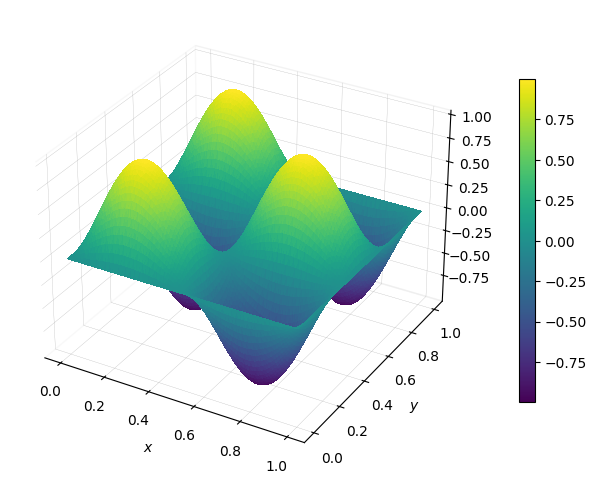

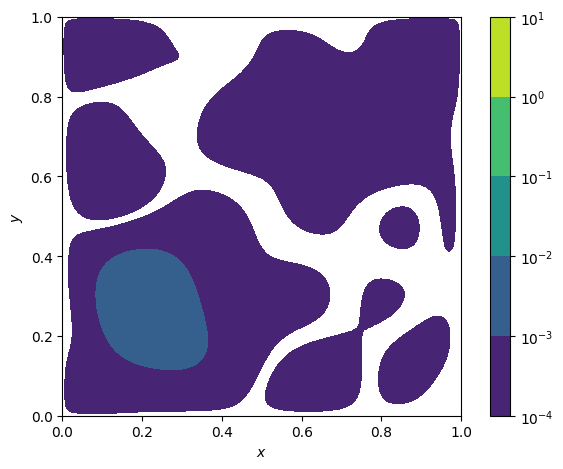

/Users/davord/Library/CloudStorage/OneDrive-UniversitetetiOslo/project3/venv_project3/lib/python3.9/site-packages/keras/src/activations.py:549: UserWarning: The object being serialized includes a `lambda`. This is unsafe. In order to reload the object, you will have to pass `safe_mode=False` to the loading function. Please avoid using `lambda` in the future, and use named Python functions instead. This is the `lambda` being serialized: periodic_activation = lambda x: x + tf.sin(x)**2

  fn_config = serialization_lib.serialize_keras_object(activation)


Epoch 50000 -- Training loss: 0.0012146922892803125
lr=0.01_activation=<function <lambda> at 0x16c180160>_hidden_layers=[32]
Final loss: 0.0012146922892803125
Test loss: 0.0058084395932684


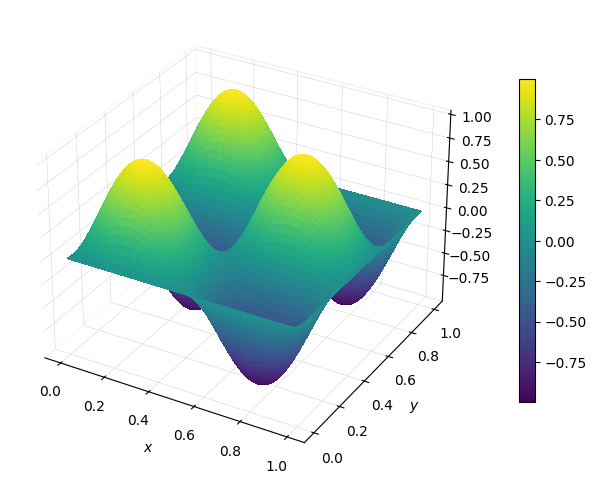

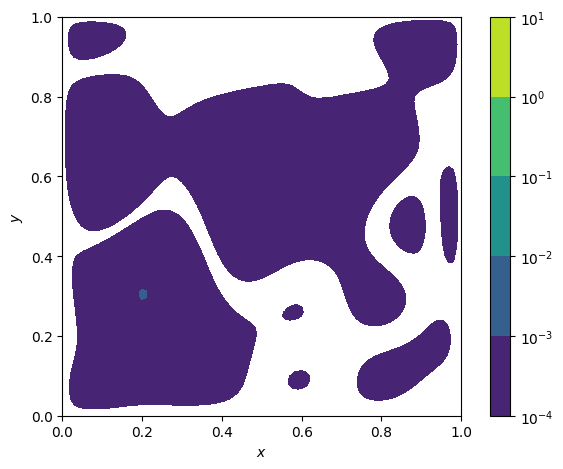

Epoch 50000 -- Training loss: 0.0008427151277961905
lr=0.01_activation=<function <lambda> at 0x16c180160>_hidden_layers=[16, 16]
Final loss: 0.0008427151277961905
Test loss: 42.27270989860149


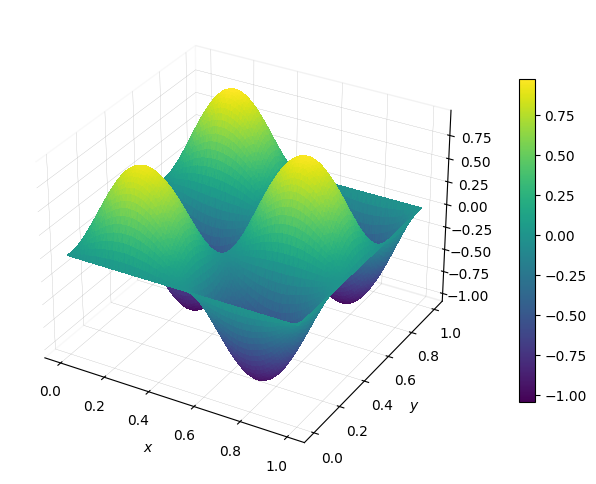

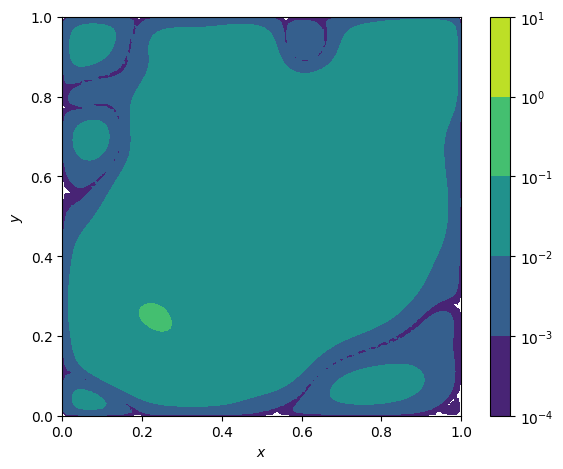

Epoch 50000 -- Training loss: 0.04361126648162008
lr=0.01_activation=<function <lambda> at 0x16c180160>_hidden_layers=[32, 32]
Final loss: 0.04361126648162008
Test loss: 155.26177573105778


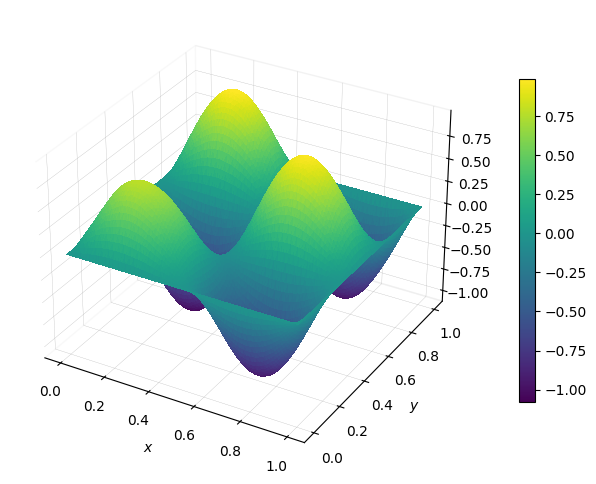

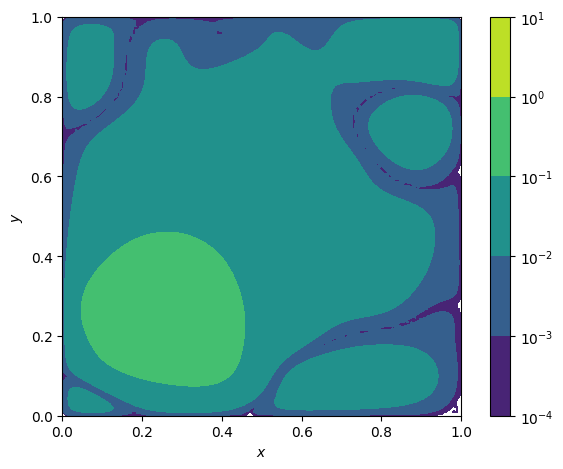

Epoch 50000 -- Training loss: 0.08804642120980813
lr=0.01_activation=<function <lambda> at 0x16c180160>_hidden_layers=[16, 16, 16]
Final loss: 0.08804642120980813
Test loss: 248.16833529776693


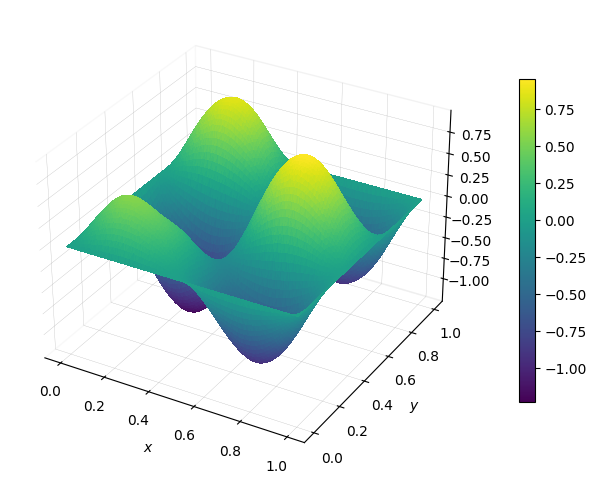

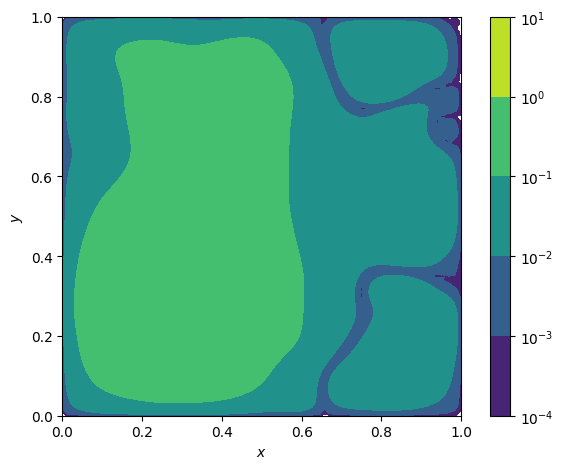

Epoch 50000 -- Training loss: 0.07643697244951692
lr=0.01_activation=<function <lambda> at 0x16c180160>_hidden_layers=[32, 32, 32]
Final loss: 0.07643697244951692
Test loss: 119.5574632534689


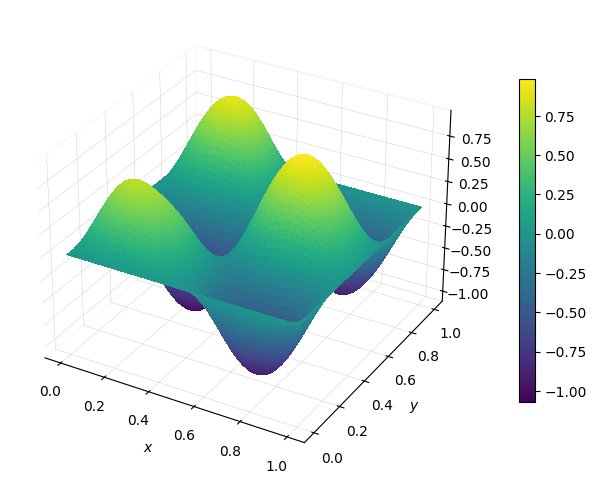

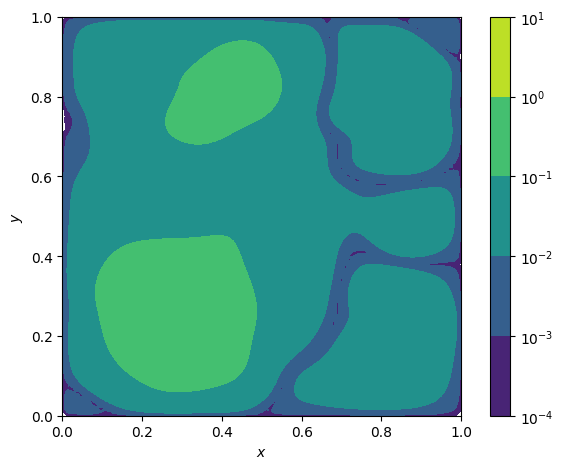

Epoch 50000 -- Training loss: 1.092294324635349
lr=0.001_activation=sigmoid_hidden_layers=[16]
Final loss: 1.092294324635349
Test loss: 10.16618779735664


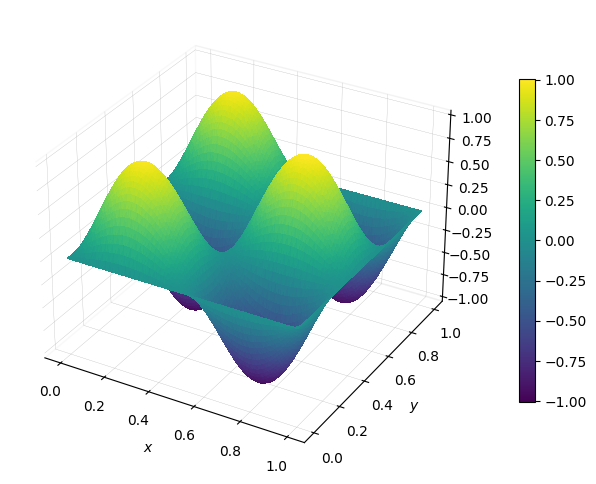

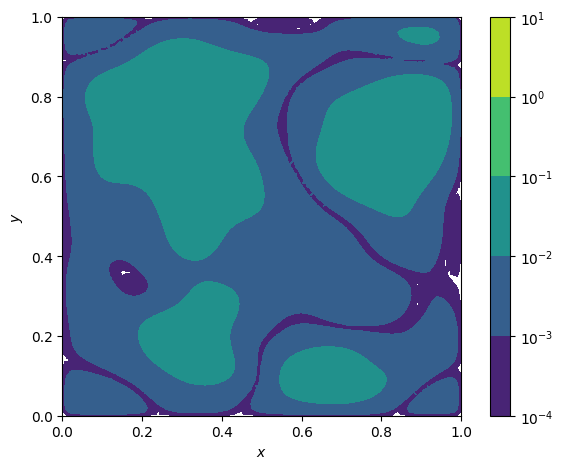

Epoch 50000 -- Training loss: 0.007369292204581086
lr=0.001_activation=sigmoid_hidden_layers=[32]
Final loss: 0.007369292204581086
Test loss: 2848.8826281677207


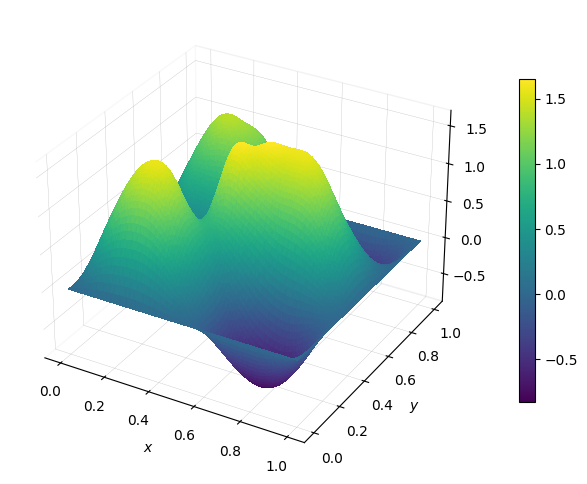

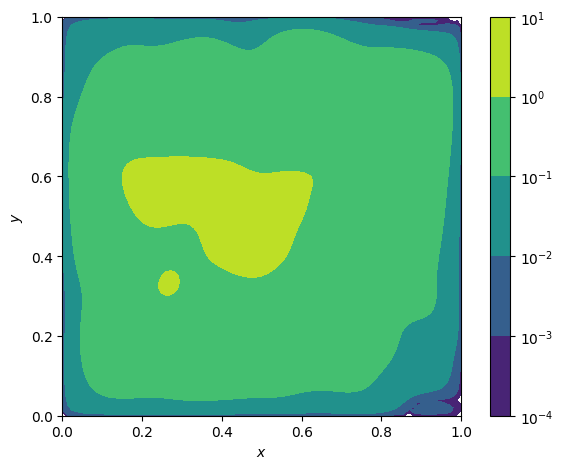

Epoch 50000 -- Training loss: 1039.3494285300858
lr=0.001_activation=sigmoid_hidden_layers=[16, 16]
Final loss: 1039.3494285300858
Test loss: 20424.80943436458


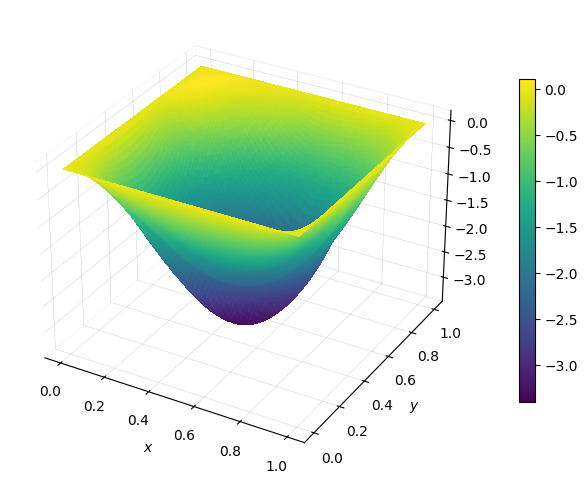

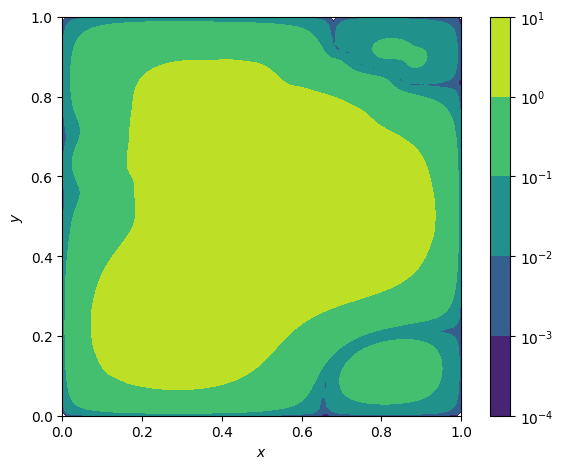

Epoch 50000 -- Training loss: 46.44911516909678
lr=0.001_activation=sigmoid_hidden_layers=[32, 32]
Final loss: 46.44911516909678
Test loss: 65257.20900397953


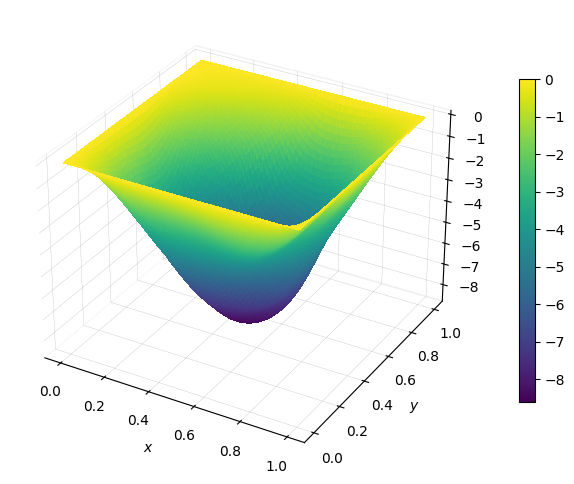

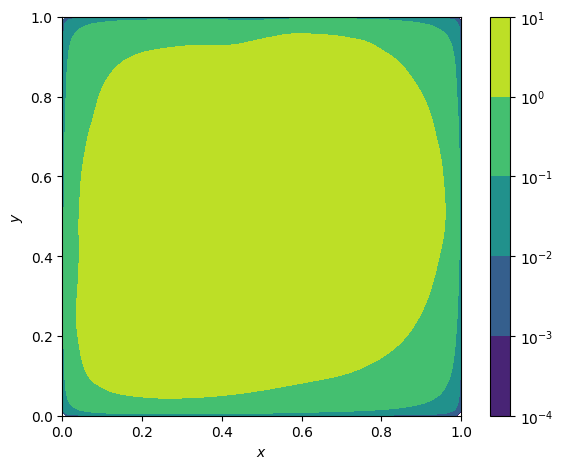

Epoch 50000 -- Training loss: 361.4733706582005
lr=0.001_activation=sigmoid_hidden_layers=[16, 16, 16]
Final loss: 361.4733706582005
Test loss: 141070.74642822324


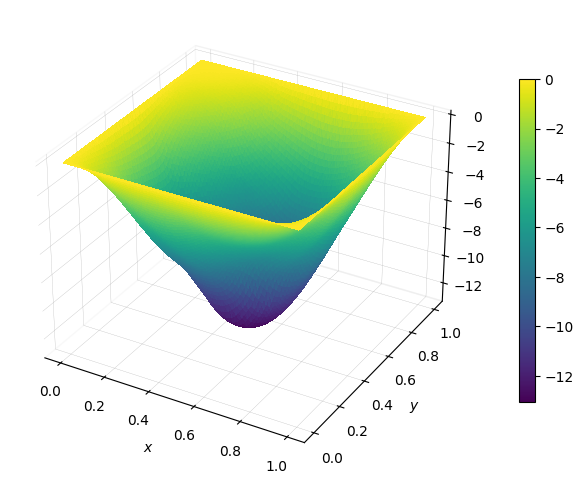

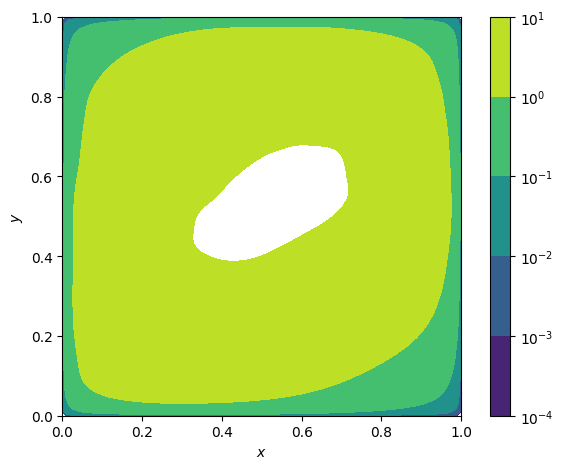

Epoch 50000 -- Training loss: 111.95116877453381
lr=0.001_activation=sigmoid_hidden_layers=[32, 32, 32]
Final loss: 111.95116877453381
Test loss: 104487.18941880399


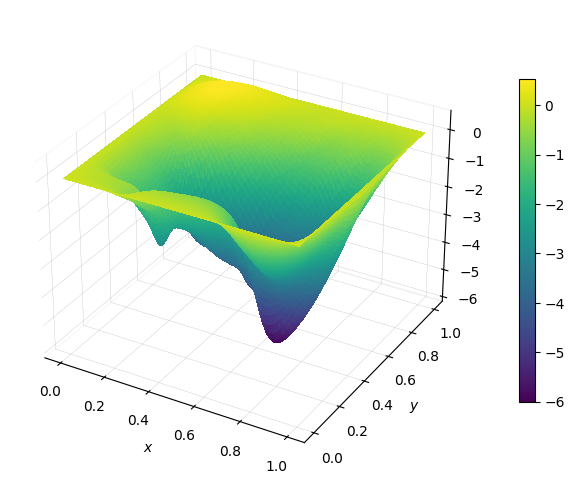

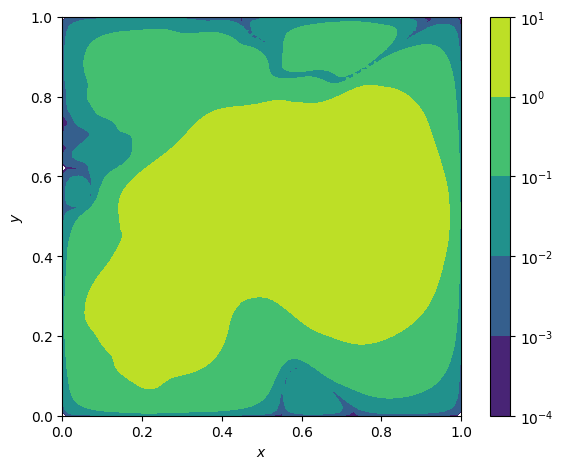

Epoch 50000 -- Training loss: 0.6185694655006825
lr=0.001_activation=tanh_hidden_layers=[16]
Final loss: 0.6185694655006825
Test loss: 40.70971527316925


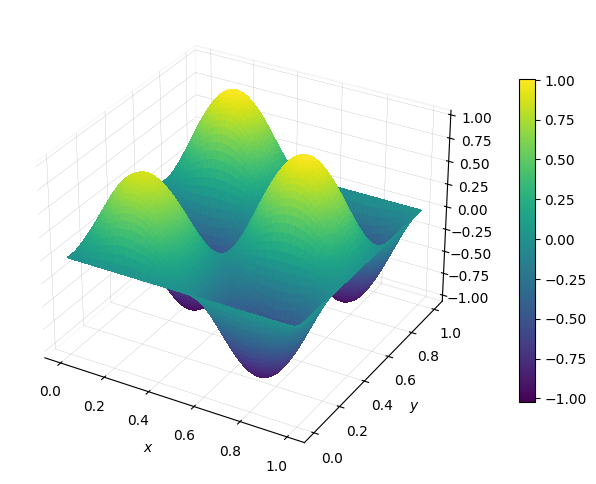

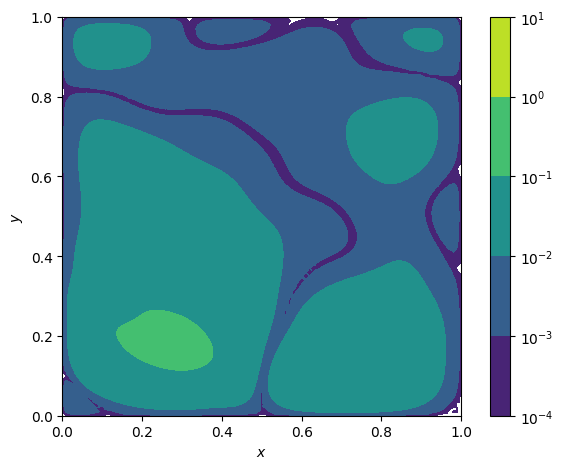

Epoch 50000 -- Training loss: 0.004095009314907627
lr=0.001_activation=tanh_hidden_layers=[32]
Final loss: 0.004095009314907627
Test loss: 80.38392453383169


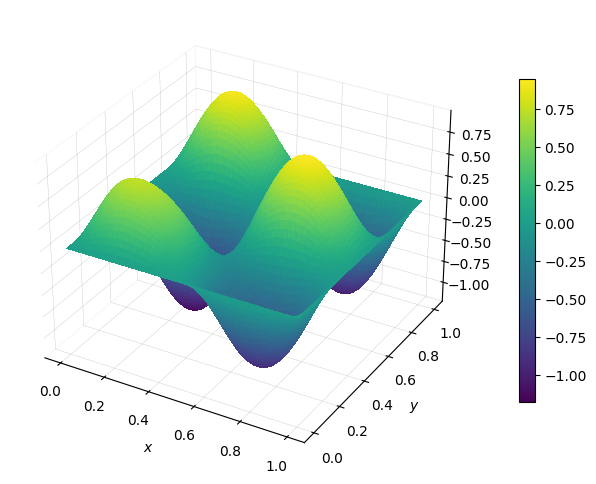

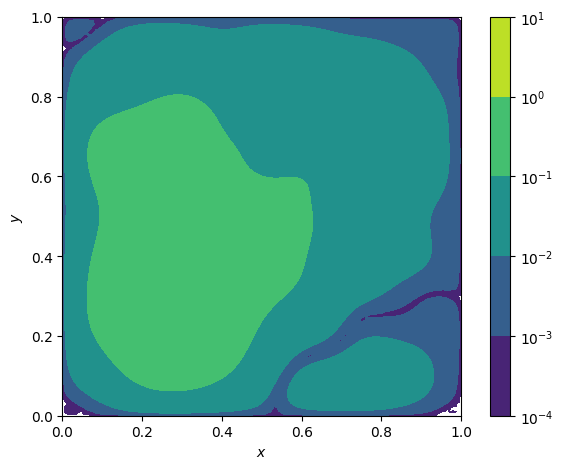

Epoch 50000 -- Training loss: 548.442696596366
lr=0.001_activation=tanh_hidden_layers=[16, 16]
Final loss: 548.442696596366
Test loss: 36790.07805013794


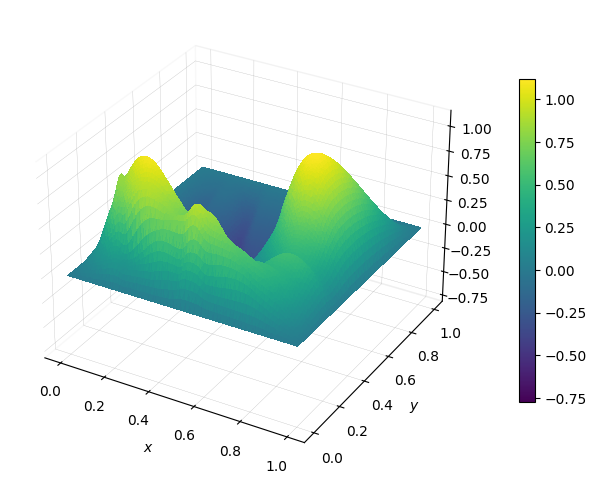

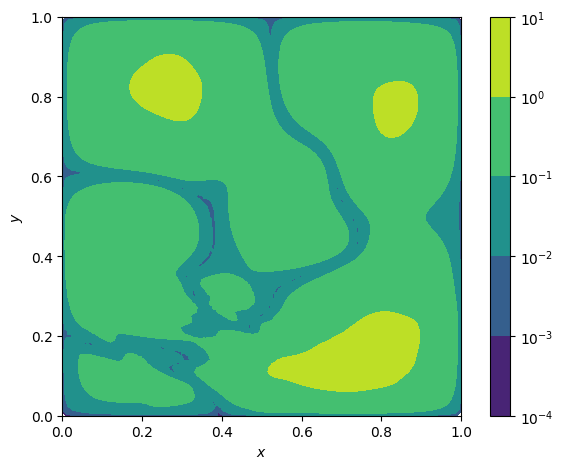

Epoch 50000 -- Training loss: 713.4388043130698
lr=0.001_activation=tanh_hidden_layers=[32, 32]
Final loss: 713.4388043130698
Test loss: 75495.62725938446


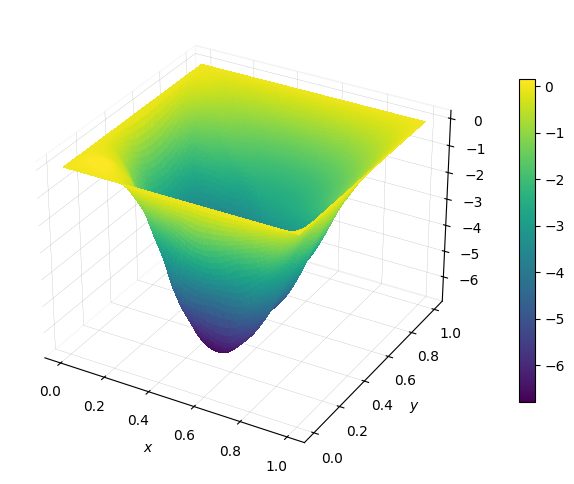

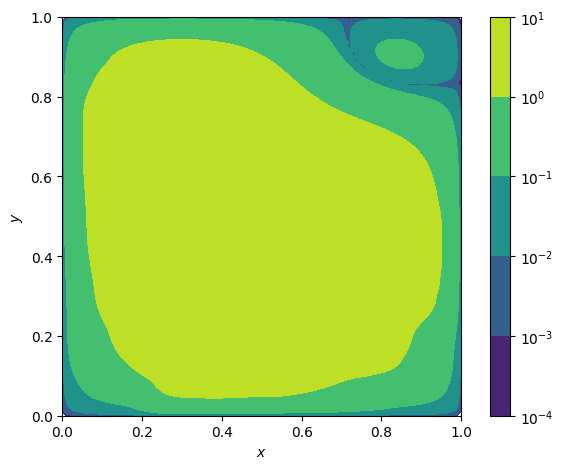

Epoch 50000 -- Training loss: 2099.6860270096977
lr=0.001_activation=tanh_hidden_layers=[16, 16, 16]
Final loss: 2099.6860270096977
Test loss: 142846.23867874418


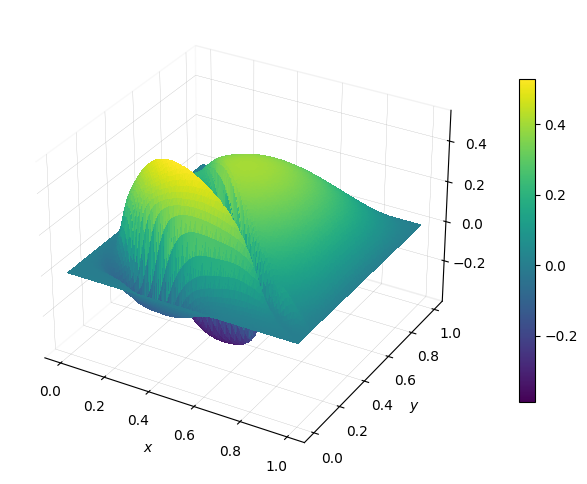

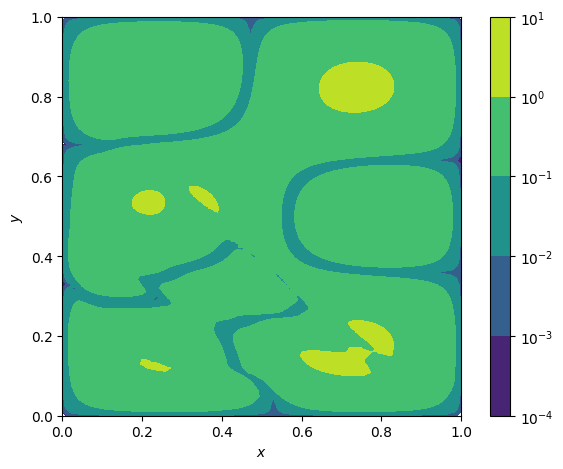

Epoch 50000 -- Training loss: 64.01894332218879
lr=0.001_activation=tanh_hidden_layers=[32, 32, 32]
Final loss: 64.01894332218879
Test loss: 61291.24251085448


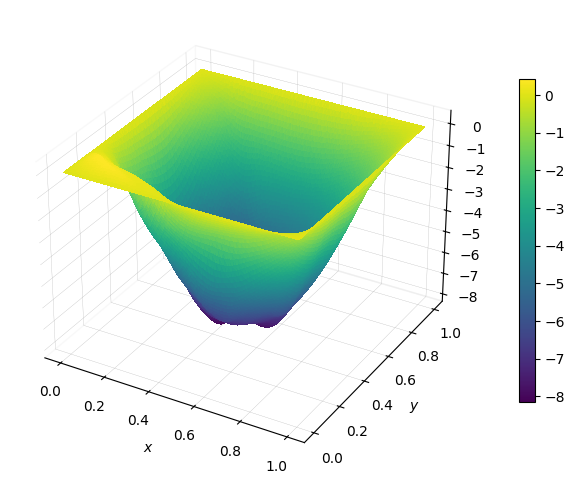

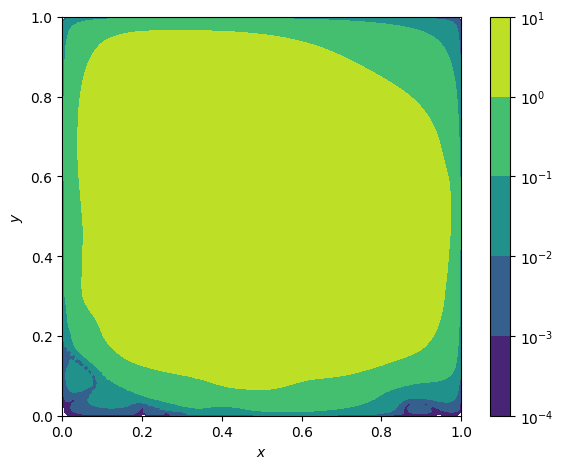

Epoch 50000 -- Training loss: 0.0026492148591449895
lr=0.001_activation=<function <lambda> at 0x16c180160>_hidden_layers=[16]
Final loss: 0.0026492148591449895
Test loss: 0.012451484363372498


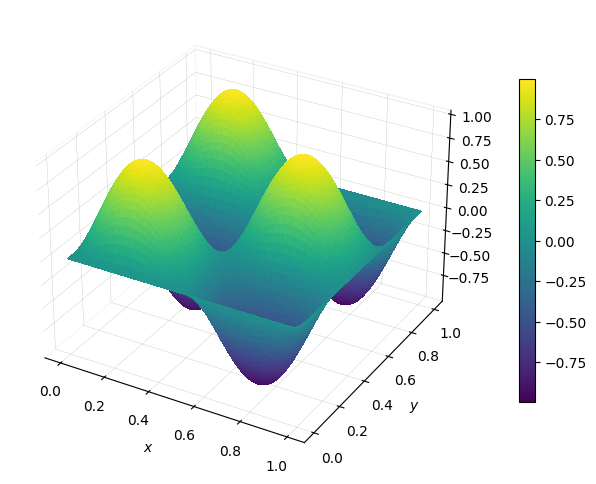

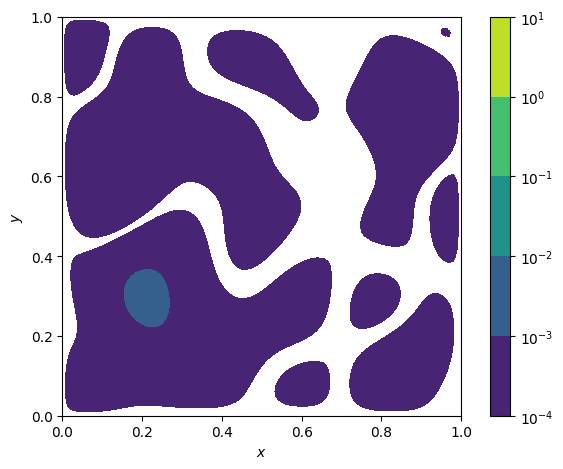

Epoch 50000 -- Training loss: 0.0005831562641100929
lr=0.001_activation=<function <lambda> at 0x16c180160>_hidden_layers=[32]
Final loss: 0.0005831562641100929
Test loss: 0.003461453190277049


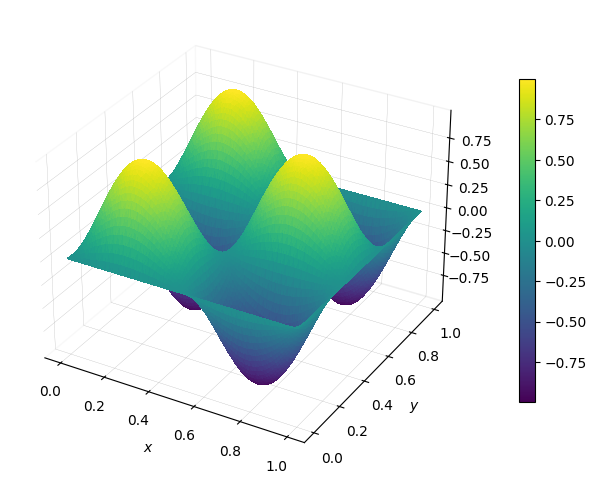

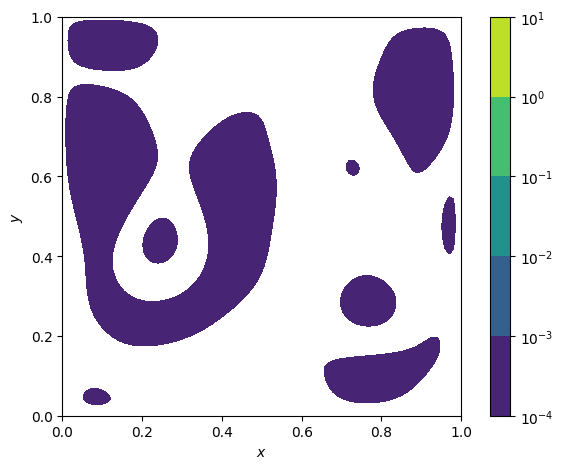

Epoch 50000 -- Training loss: 0.006177588382753984
lr=0.001_activation=<function <lambda> at 0x16c180160>_hidden_layers=[16, 16]
Final loss: 0.006177588382753984
Test loss: 925.435414887497


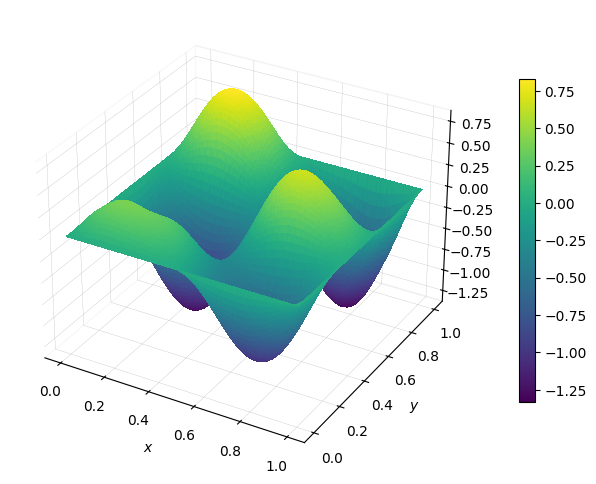

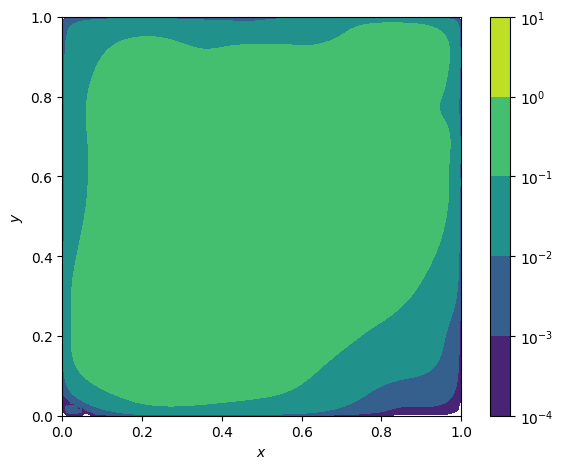

Epoch 50000 -- Training loss: 0.0006345588591100953
lr=0.001_activation=<function <lambda> at 0x16c180160>_hidden_layers=[32, 32]
Final loss: 0.0006345588591100953
Test loss: 77.26316729858046


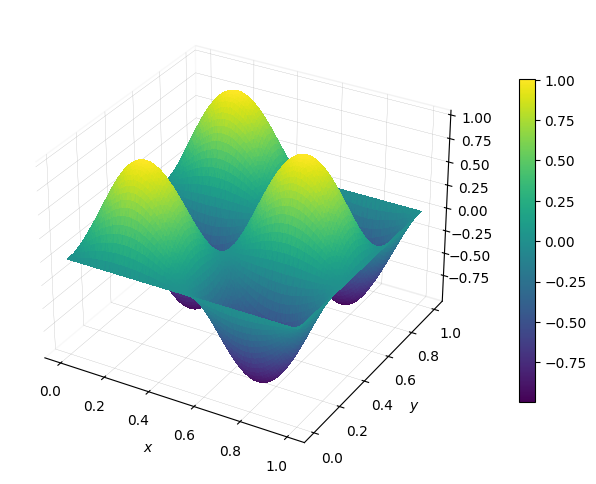

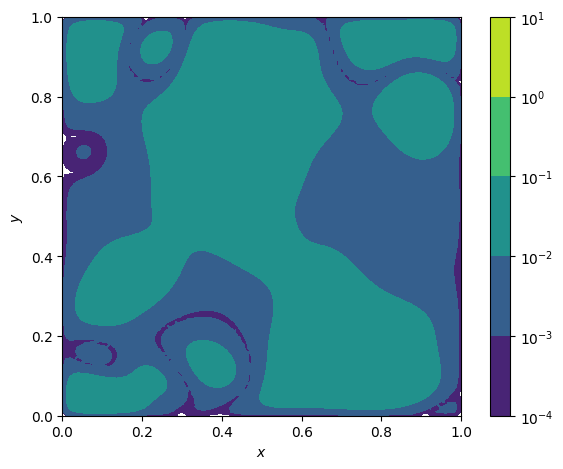

Epoch 50000 -- Training loss: 0.005340288014371815
lr=0.001_activation=<function <lambda> at 0x16c180160>_hidden_layers=[16, 16, 16]
Final loss: 0.005340288014371815
Test loss: 1453.463516830553


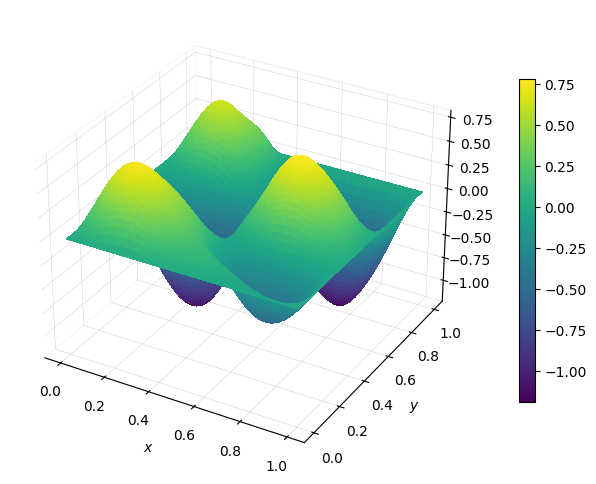

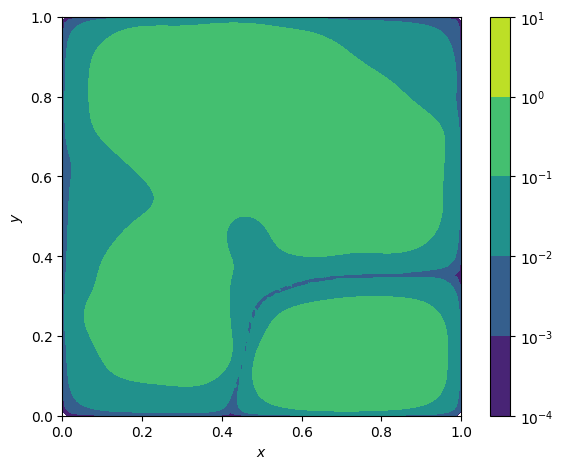

Epoch 50000 -- Training loss: 0.03535799647260357
lr=0.001_activation=<function <lambda> at 0x16c180160>_hidden_layers=[32, 32, 32]
Final loss: 0.03535799647260357
Test loss: 898.0250945329544


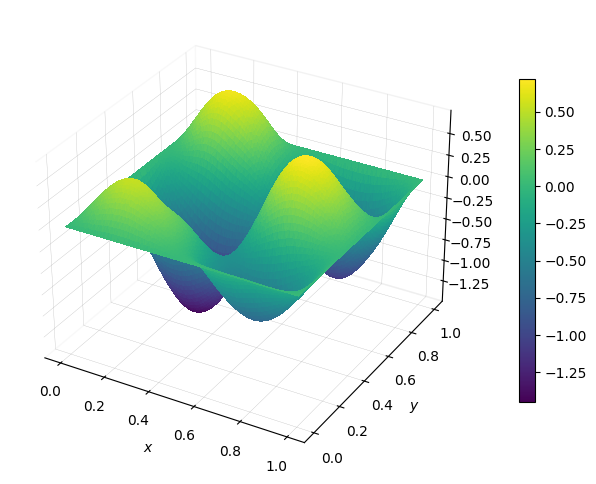

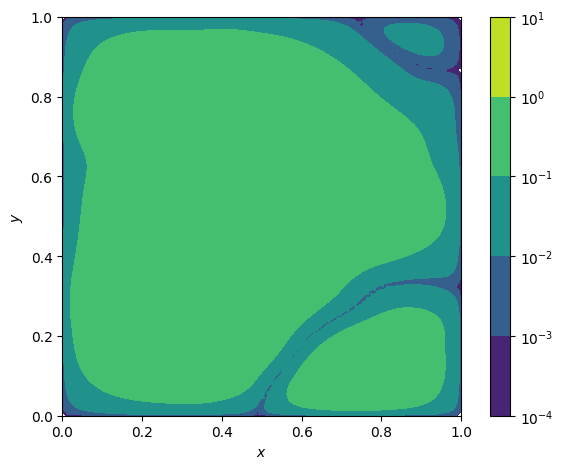

Epoch 50000 -- Training loss: 3862.9499222443415
lr=0.0001_activation=sigmoid_hidden_layers=[16]
Final loss: 3862.9499222443415
Test loss: 4024.0792888374804


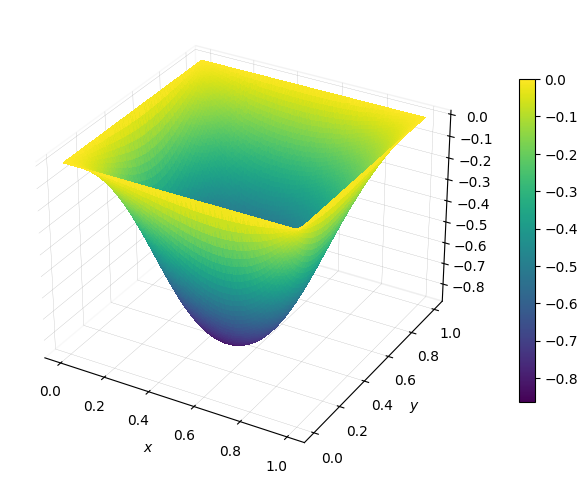

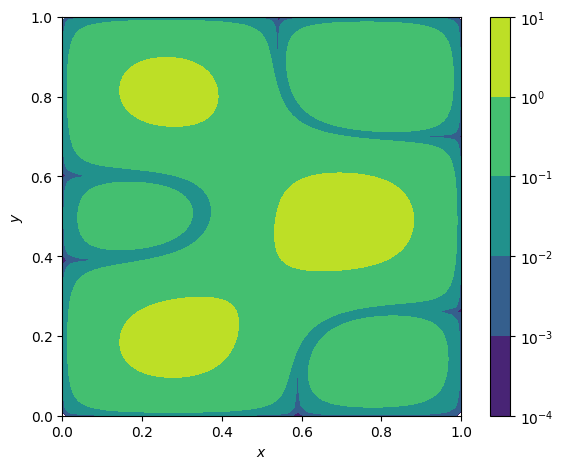

Epoch 50000 -- Training loss: 3343.833678117425
lr=0.0001_activation=sigmoid_hidden_layers=[32]
Final loss: 3343.833678117425
Test loss: 3512.2848746051773


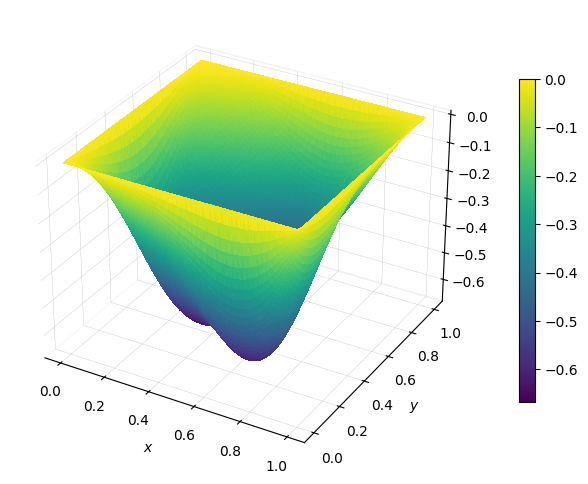

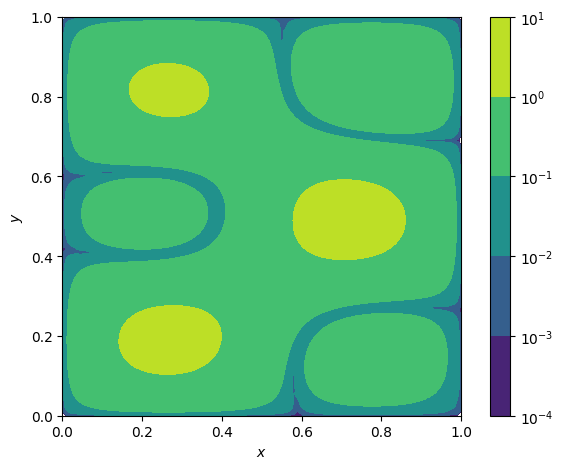

Epoch 50000 -- Training loss: 1883.7958990750392
lr=0.0001_activation=sigmoid_hidden_layers=[16, 16]
Final loss: 1883.7958990750392
Test loss: 5807.098802031649


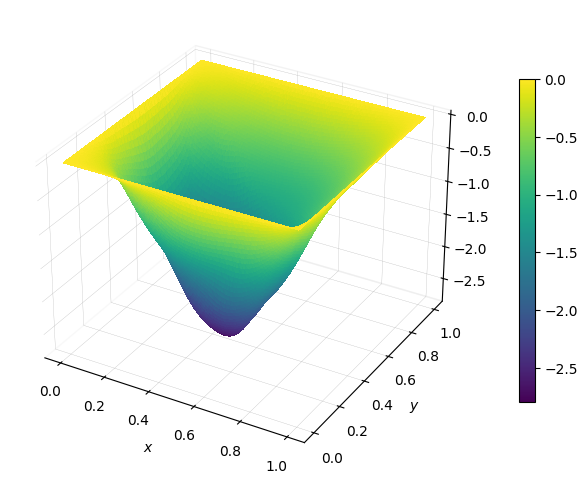

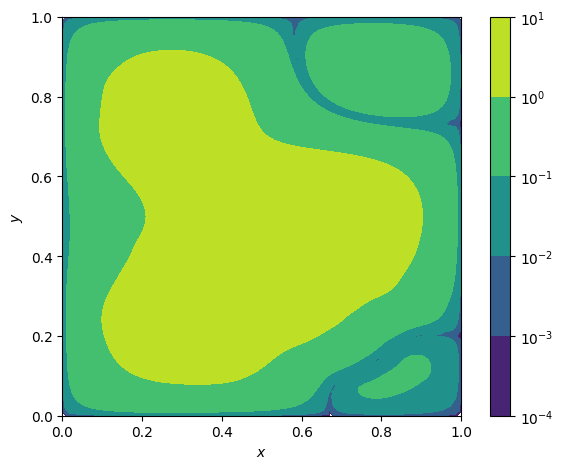

Epoch 50000 -- Training loss: 1460.1365378088065
lr=0.0001_activation=sigmoid_hidden_layers=[32, 32]
Final loss: 1460.1365378088065
Test loss: 6451.612785737682


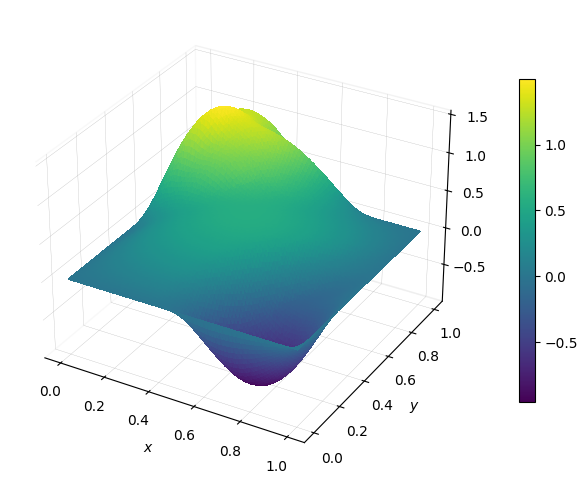

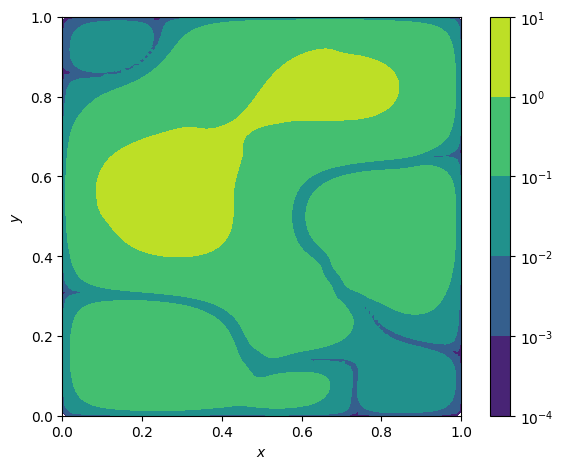

Epoch 50000 -- Training loss: 3464.484549437597
lr=0.0001_activation=sigmoid_hidden_layers=[16, 16, 16]
Final loss: 3464.484549437597
Test loss: 7598.735952046197


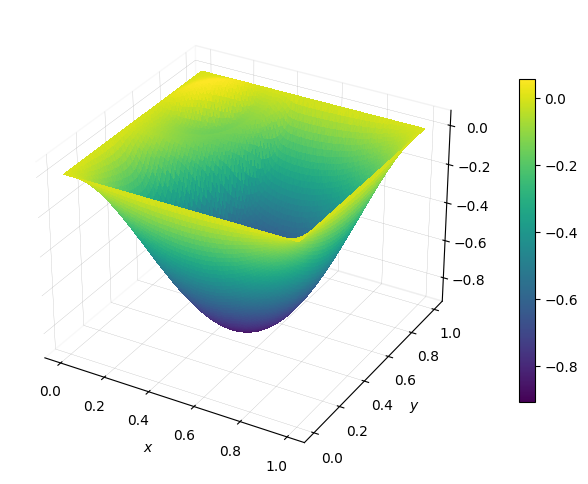

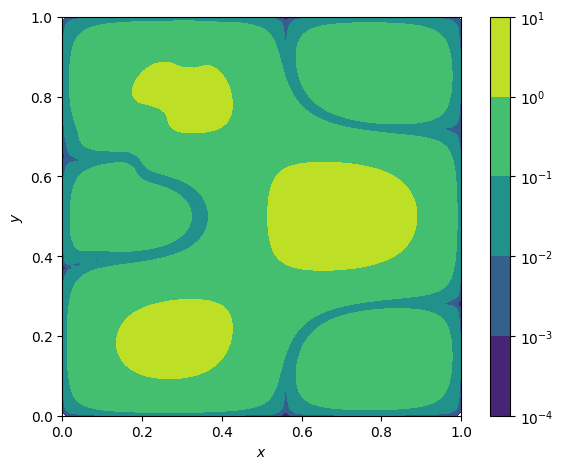

Epoch 50000 -- Training loss: 1649.0451685876737
lr=0.0001_activation=sigmoid_hidden_layers=[32, 32, 32]
Final loss: 1649.0451685876737
Test loss: 13067.880581798756


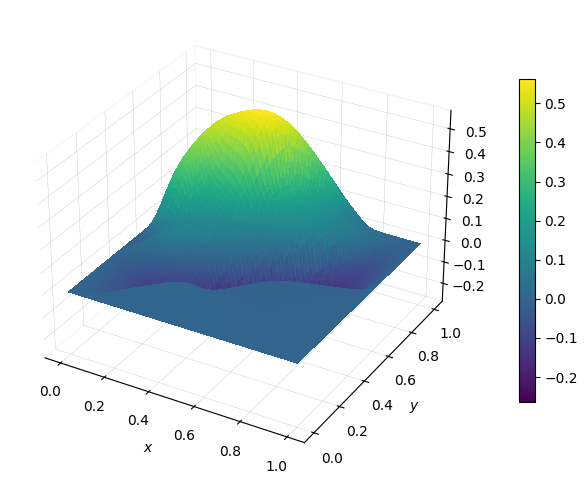

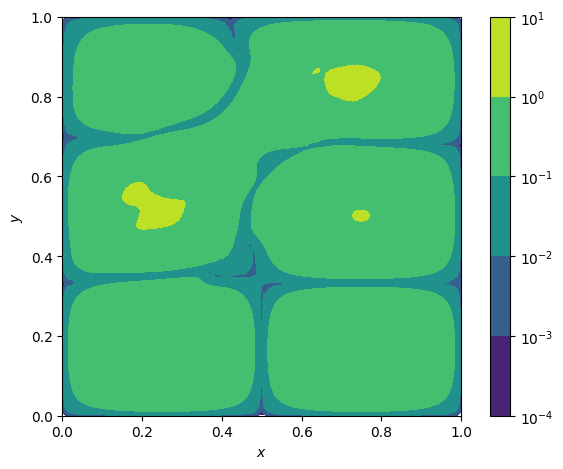

Epoch 50000 -- Training loss: 2589.2447955426674
lr=0.0001_activation=tanh_hidden_layers=[16]
Final loss: 2589.2447955426674
Test loss: 2917.287231154975


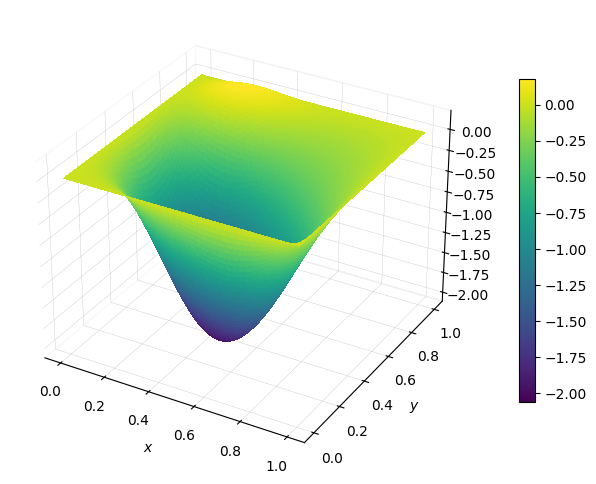

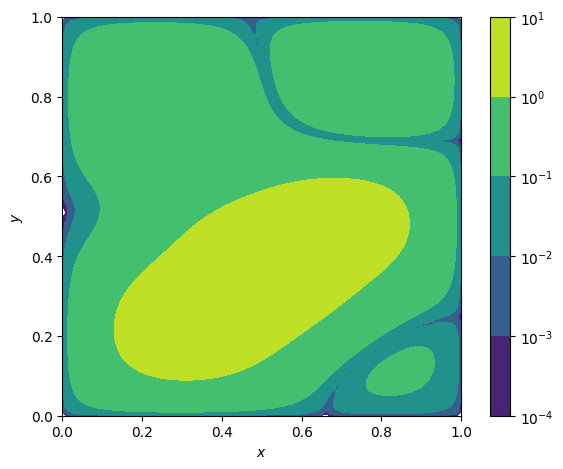

Epoch 50000 -- Training loss: 1346.744500533624
lr=0.0001_activation=tanh_hidden_layers=[32]
Final loss: 1346.744500533624
Test loss: 1571.1375825500024


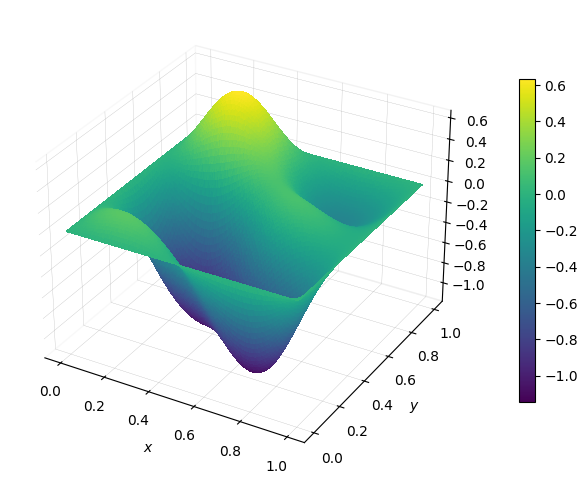

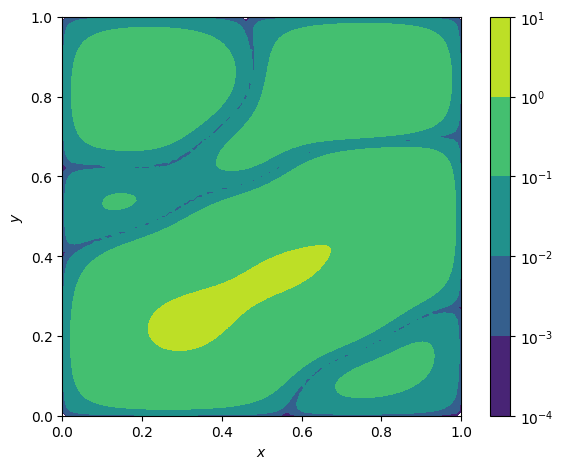

Epoch 50000 -- Training loss: 2702.2928145407222
lr=0.0001_activation=tanh_hidden_layers=[16, 16]
Final loss: 2702.2928145407222
Test loss: 13489.46232697498


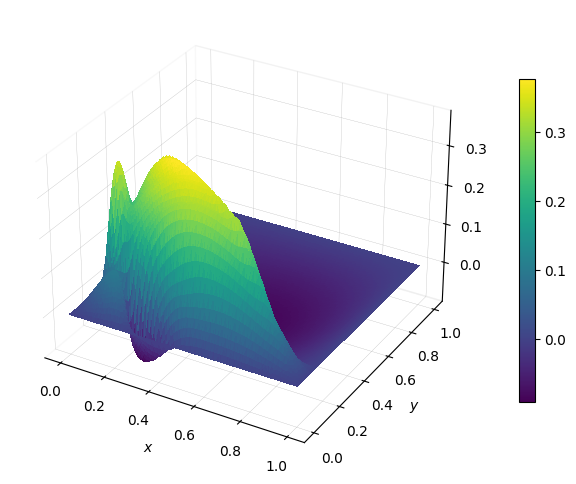

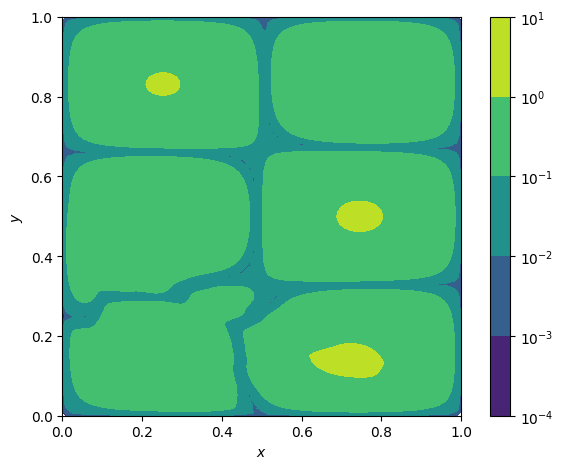

Epoch 50000 -- Training loss: 1827.2178647099045
lr=0.0001_activation=tanh_hidden_layers=[32, 32]
Final loss: 1827.2178647099045
Test loss: 21360.353413053992


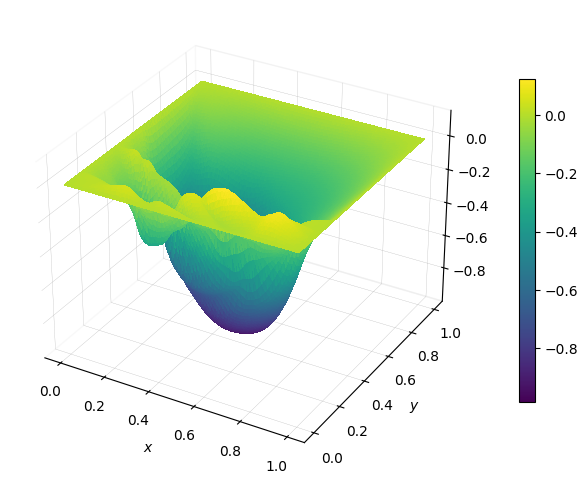

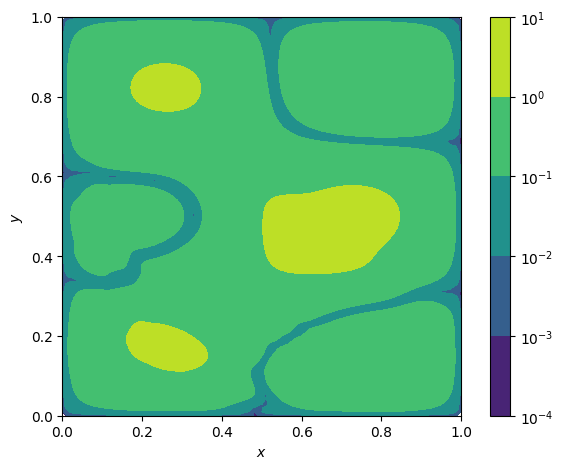

Epoch 50000 -- Training loss: 1772.9213519265772
lr=0.0001_activation=tanh_hidden_layers=[16, 16, 16]
Final loss: 1772.9213519265772
Test loss: 28483.60250471091


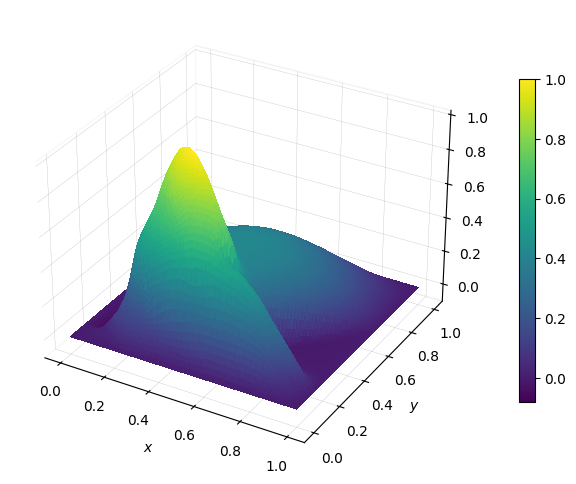

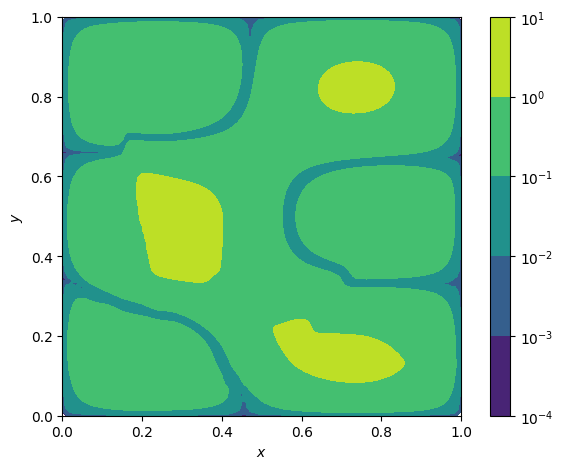

Epoch 50000 -- Training loss: 38.593592192608426
lr=0.0001_activation=tanh_hidden_layers=[32, 32, 32]
Final loss: 38.593592192608426
Test loss: 78296.01276648605


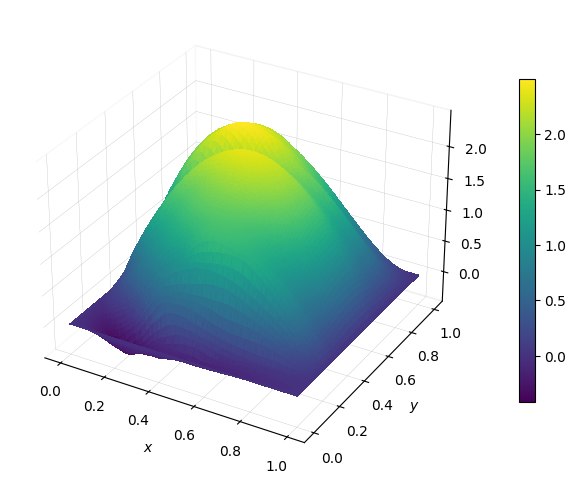

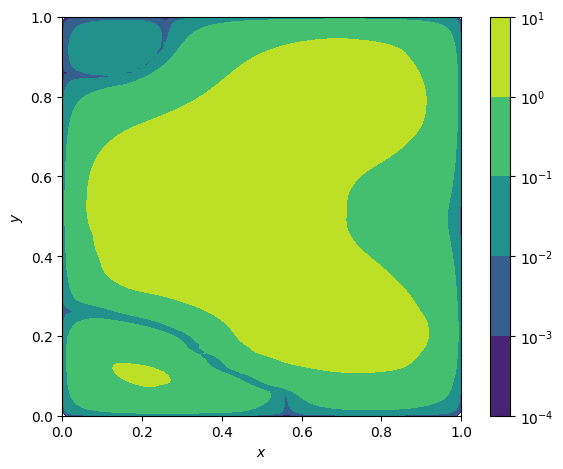

Epoch 50000 -- Training loss: 785.2331930372732
lr=0.0001_activation=<function <lambda> at 0x16c180160>_hidden_layers=[16]
Final loss: 785.2331930372732
Test loss: 954.3881002227571


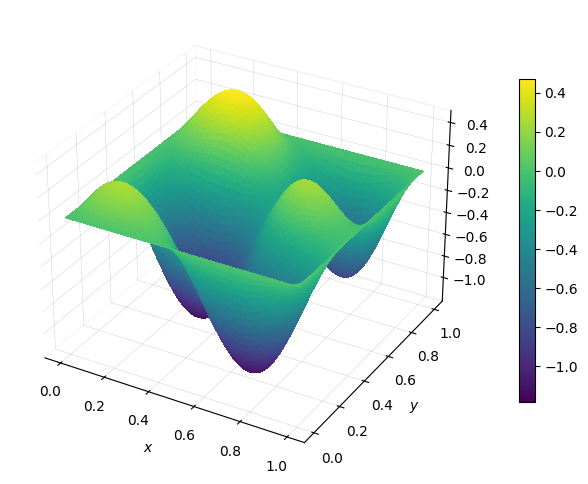

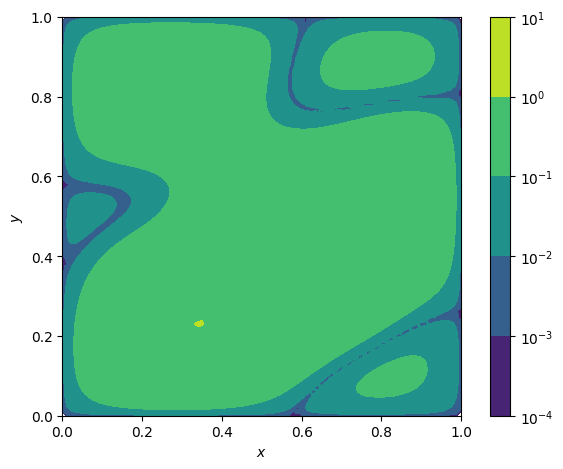

Epoch 50000 -- Training loss: 0.7717575224724297
lr=0.0001_activation=<function <lambda> at 0x16c180160>_hidden_layers=[32]
Final loss: 0.7717575224724297
Test loss: 1.5631113294649477


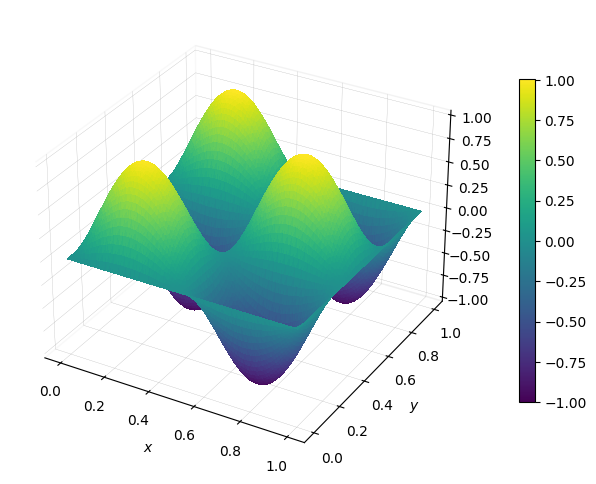

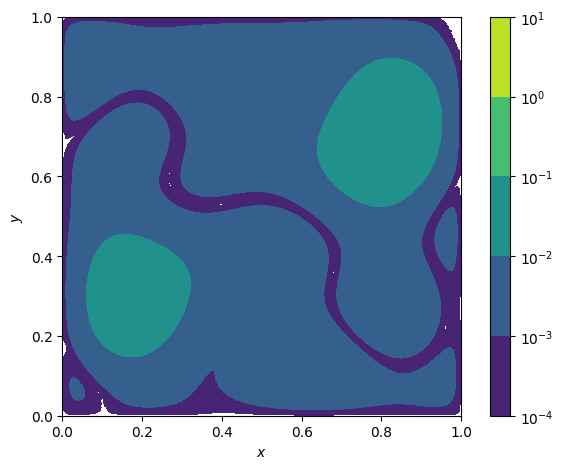

Epoch 50000 -- Training loss: 0.020706974035431393
lr=0.0001_activation=<function <lambda> at 0x16c180160>_hidden_layers=[16, 16]
Final loss: 0.020706974035431393
Test loss: 830.3693031739865


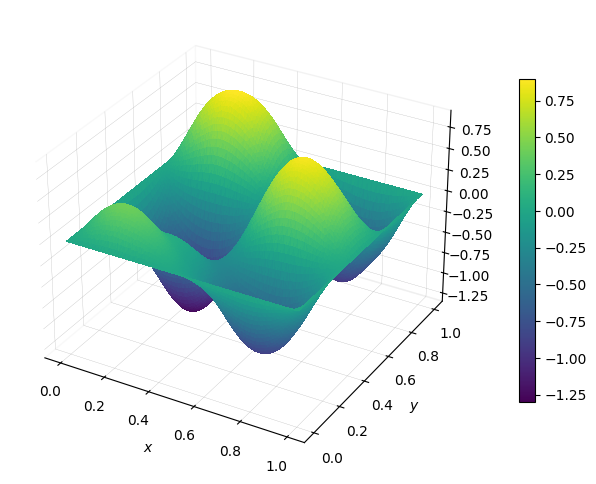

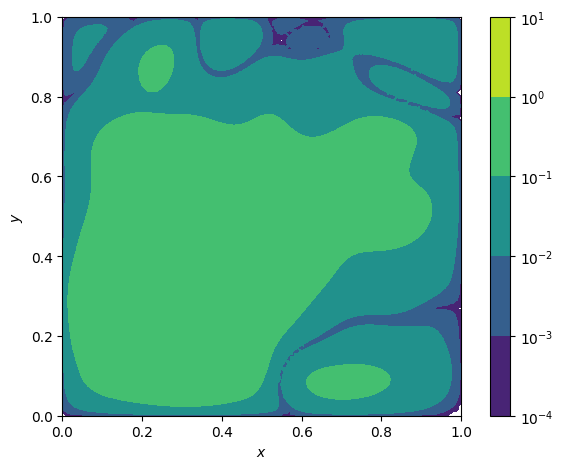

Epoch 50000 -- Training loss: 0.00028744930621838285
lr=0.0001_activation=<function <lambda> at 0x16c180160>_hidden_layers=[32, 32]
Final loss: 0.00028744930621838285
Test loss: 632.6615843165131


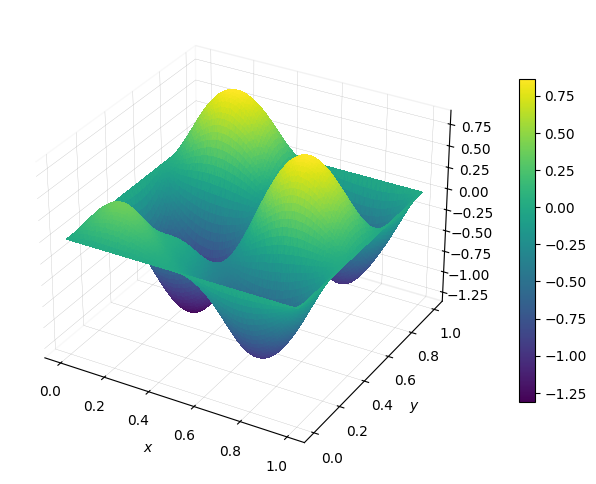

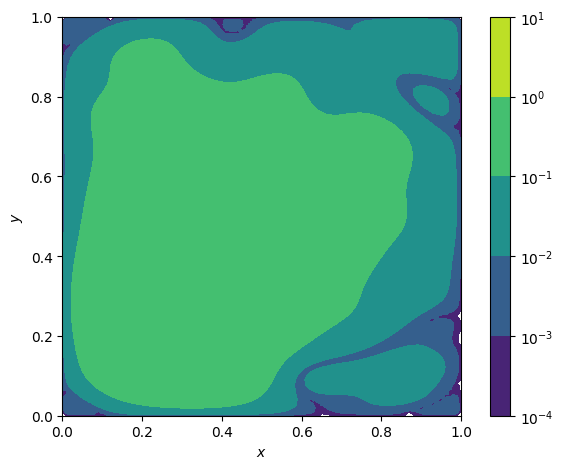

Epoch 50000 -- Training loss: 1.2848271138084715e-07
lr=0.0001_activation=<function <lambda> at 0x16c180160>_hidden_layers=[16, 16, 16]
Final loss: 1.2848271138084715e-07
Test loss: 3961.79589407015


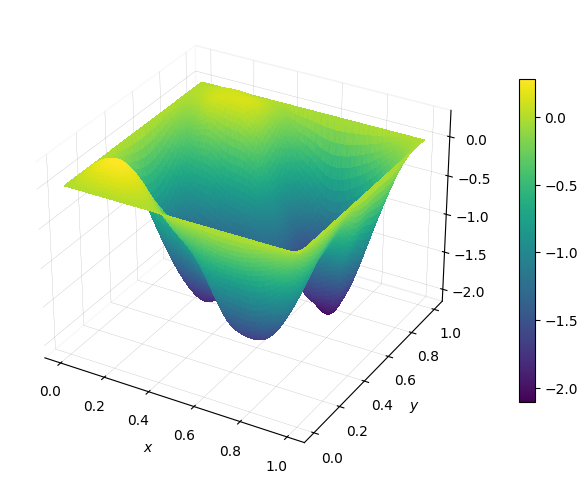

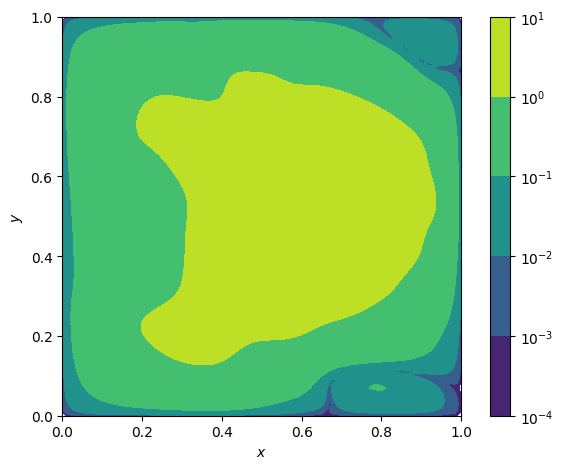

Epoch 50000 -- Training loss: 0.0007972684182011867
lr=0.0001_activation=<function <lambda> at 0x16c180160>_hidden_layers=[32, 32, 32]
Final loss: 0.0007972684182011867
Test loss: 741.7010965075092


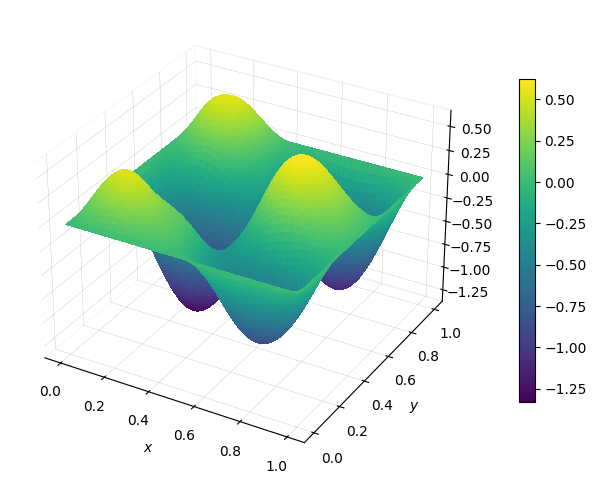

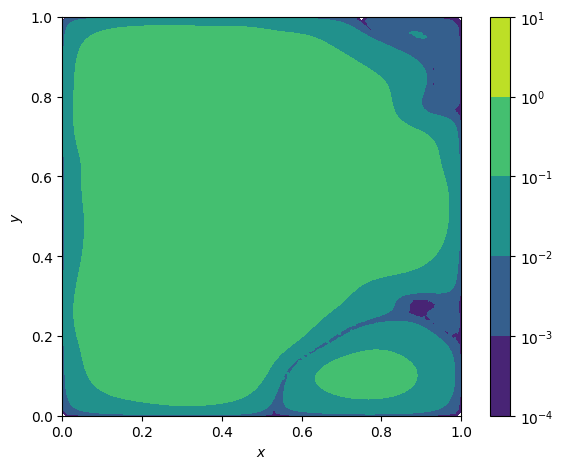

In [7]:
# Consider different parameters

# Axctivation function proposed by Ziyin et al. (2020)
periodic_activation = lambda x: x + tf.sin(x)**2

learning_rates = [1e-2, 1e-3, 1e-4]
activations = ['sigmoid', 'tanh', periodic_activation]  # all twice differentiable
hidden_layers_configs = [[16], [32], [16, 16], [32, 32], [16, 16, 16], [32, 32, 32]]

best_loss = np.inf
best_model = None
best_params = None

# Initialize a dictionary to store the models and their losses
models_and_losses = {}

for learning_rate in learning_rates:
    for activation in activations:
        for hidden_layers in hidden_layers_configs:
            network = tf.keras.models.Sequential()
            network.add(tf.keras.layers.Input(shape=(2,)))
            for nodes in hidden_layers:
                network.add(tf.keras.layers.Dense(nodes, activation=activation))
            network.add(tf.keras.layers.Dense(1))
            optimiser = tf.keras.optimizers.Adam(learning_rate=learning_rate)
            model = Model(pde_lagaris, network, optimiser)
            losses = model.train(x_train, num_epochs=50000, verbose=False)
            final_loss = losses[-1]
            test_loss = model.test(x_test)
            if final_loss < best_loss:
                best_loss = final_loss
                best_model = model
                best_params = {'learning_rate': learning_rate, 'activation': activation, 'hidden_layers': hidden_layers}

            # Save the model and its losses in the dictionary
            key = f'lr={learning_rate}_activation={activation}_hidden_layers={hidden_layers}'
            models_and_losses[key] = {'model': model, 'losses': losses, 'test_loss': test_loss}

            print(key)
            print(f'Final loss: {final_loss}')
            print(f'Test loss: {test_loss}')

            v = trial_fn(x_grid, model.net)
            fig, _ = plot_surface(x_grid, v)
            fig.savefig(f'figures/p3_{key}_cont.png', dpi=300, bbox_inches='tight')
            plt.show()

            fig, _ = plot_error(x_grid, v, u_analytical, title=False, levels=np.logspace(-4, 1, 6))
            fig.savefig(f'figures/p3_{key}_error.png', dpi=300, bbox_inches='tight')
            plt.show()

            model.net.save(f'models_and_losses/{key}.h5')
            np.save(f'models_and_losses/{key}_losses.npy', losses)

In [ ]:
# Save the results in a csv file

import pandas as pd
import plotly.express as px

# Convert the models_and_losses dictionary into a list of dictionaries
data = []
for key, value in models_and_losses.items():
    params = key.split('_')
    learning_rate = float(params[0].split('=')[1])
    activation = params[1].split('=')[1]
    # if activation is the lambda function, change name to 'periodic'
    if '<lambda>' in activation:
        activation = 'x+sin^2(x)'
    hidden_layers = list(map(int, params[3].split('=')[1].strip('[]').split(',')))
    num_layers = len(hidden_layers)
    num_nodes = hidden_layers[0]
    test_loss = value['test_loss'].numpy()
    training_loss = value['losses'][-1]
    data.append({'learning_rate': learning_rate, 'activation': activation, 'num_layers': num_layers, 'num_nodes': num_nodes, 'training_loss': training_loss, 'test_loss': test_loss})

df = pd.DataFrame(data)
df.to_csv('models_and_losses.csv', index=False)

In [10]:
import pandas as pd
import plotly.express as px
import numpy as np

df = pd.read_csv('models_and_losses.csv')
df['learning_rate'] = np.log10(df['learning_rate'])
df['test_loss'] = np.log10(df['test_loss'])
df['training_loss'] = np.log10(df['training_loss'])
df['test_loss'] = df['test_loss'].astype(float)

activations = df['activation'].unique()

# Create a separate parallel-coordinates plot for each activation
for activation in activations:
    data = df[df['activation'] == activation]
    
    df_filtered = pd.DataFrame(data=data.values, columns=data.columns)
    fig = px.parallel_coordinates(data,
                                  color='test_loss',
                                  dimensions=data.columns,
                                  labels={'learning_rate': 'Learning Rate (log)', 'num_layers': 'Number of Layers', 'num_nodes': 'Number of Nodes', 'training_loss': 'Training Loss (log)', 'test_loss': 'Test Loss (log)'}, 
                                  color_continuous_scale=px.colors.sequential.Bluered,
    )

    # Remove the original colorbar label
    fig.update_coloraxes(colorbar_title="")

    # Add a vertical colorbar label
    fig.add_annotation(
        text="Test Loss (log)",
        xref="paper", yref="paper",
        x=1.03, y=0.5,
        showarrow=False,
        textangle=-90
    )

    fig.write_image(f'figures/p3_parallel_{activation}.png', width=800, height=400, scale=2)
    fig.show()

In [19]:
# Now repeat the above but with incorrectly computed second derivatives,
# as done in https://github.com/PGrabinski/NeuralDifferentialEquations
# and https://github.com/Isaac-Somerville/Neural-Networks-for-Solving-Differential-Equations/tree/main

def pde_lagaris(x, nn):
    with tf.GradientTape() as tape1:
        with tf.GradientTape() as tape2:
            tape1.watch(x)
            tape2.watch(x)
            u = trial_fn(x, nn)
        d_u = tape2.gradient(u, x)  # first derivatives (u_x, u_y)
    d2_u = tape1.gradient(d_u, x)  # THIS IS WRONG! Does implicit summation: (u_xx + u_xy, u_yy + u_xy)

    u_xx = d2_u[:, 0:1]  # THIS IS WRONG! This is: u_xx + u_xy
    u_yy = d2_u[:, 1:2]  # THIS IS WRONG! This is: u_yy + u_xy
    f =  13. * np.pi**2. * tf.sin(2.*np.pi*x[:, 0:1]) * tf.sin(3.*np.pi*x[:, 1:2])

    return tf.reduce_mean(tf.square(-u_xx - u_yy - f))

network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Input(shape=(2,)))
network.add(tf.keras.layers.Dense(10, activation='tanh'))
network.add(tf.keras.layers.Dense(1))

optimiser = tf.keras.optimizers.Adam(learning_rate=1e-3,)
model = Model(pde=pde_lagaris, net=network, optimiser=optimiser)

losses = model.train(x_train, num_epochs=50000, verbose=True)
test_loss = model.test(x_test)
print(f'Test loss: {test_loss}')

Epoch 1000 -- Training loss: 3999.5665646171256
Epoch 2000 -- Training loss: 3285.604943677507
Epoch 3000 -- Training loss: 2685.0476994856604
Epoch 4000 -- Training loss: 2474.5792373052254
Epoch 5000 -- Training loss: 2354.5512409499593
Epoch 6000 -- Training loss: 2197.4628087332203
Epoch 7000 -- Training loss: 1984.7507048247405
Epoch 8000 -- Training loss: 1831.2999507765169
Epoch 9000 -- Training loss: 1700.3388280002277
Epoch 10000 -- Training loss: 1542.658139162003
Epoch 11000 -- Training loss: 1417.4066212444536
Epoch 12000 -- Training loss: 1327.4319812498716
Epoch 13000 -- Training loss: 1239.9785110857104
Epoch 14000 -- Training loss: 1154.2032073299547
Epoch 15000 -- Training loss: 1079.6144325749967
Epoch 16000 -- Training loss: 1027.826205928083
Epoch 17000 -- Training loss: 989.9511459122234
Epoch 18000 -- Training loss: 956.4962626351265
Epoch 19000 -- Training loss: 929.4731581944297
Epoch 20000 -- Training loss: 906.5164026427443
Epoch 21000 -- Training loss: 878.11

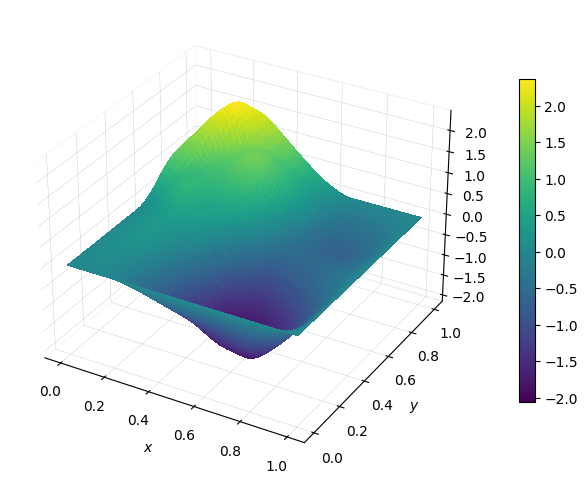

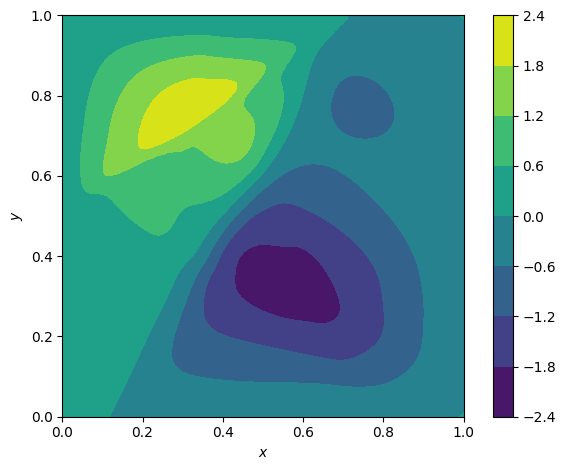

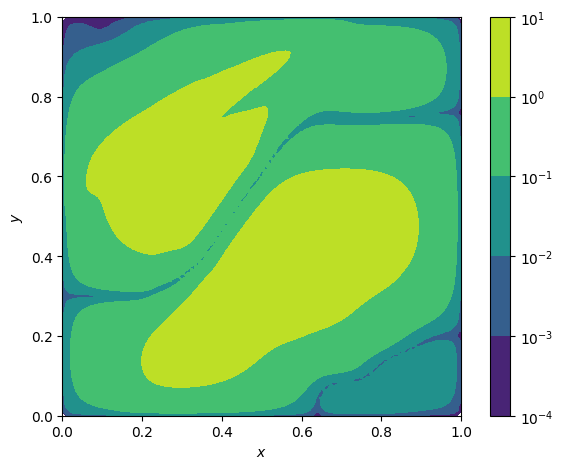

In [20]:
# Plot the solution on a fine uniform grid for aesthetic purposes
x_ = tf.linspace(0, 1, 101)
x_grid = tf.reshape(tf.stack(tf.meshgrid(x_, x_), axis=2), (-1, 2))

v = trial_fn(x_grid, model.net)
fig, _ = plot_surface(x_grid, v)
fig.savefig('figures/p3_lagaris_sin_init_wrong_surf.png', dpi=300, bbox_inches='tight')

fig, _ = plot_contour(x_grid, v)
fig.savefig('figures/p3_lagaris_sin_init_wrong_cont.png', dpi=300, bbox_inches='tight')

# Plot the absolute error of the trial solution and the analytical solution
u_analytical = lambda x, y: tf.sin(2.*np.pi*x) * tf.sin(3.*np.pi*y)
fig, _ = plot_error(x_grid, v, u_analytical, title=False, levels=np.logspace(-4, 1, 6))
fig.savefig('figures/p3_lagaris_sin_init_wrong_error.png', dpi=300, bbox_inches='tight')